In [55]:
import pandas as pd

data = pd.read_csv('athletes.csv')

## DVS

####  Question 1

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

In [57]:
data_v1 = data.copy()
data_v1.to_csv('data/athletes_v1.csv', index=False)

def run_dvc_command(cmd, description):
    """Helper function to run DVC commands"""
    print(f"\n{description}")
    print(f"Running: {cmd}")
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    
    if result.stdout:
        print("Output:")
        print(result.stdout.strip())
    if result.stderr and result.returncode != 0:
        print("Error:")
        print(result.stderr.strip())
    
    return result.returncode == 0

# Initialize DVC if needed
if not os.path.exists('.dvc'):
    run_dvc_command('dvc init --no-scm', 'Initialize DVC')
    print("DVC initialized successfully")
else:
    print("DVC already initialized")

# Check if .dvc file was created
dvc_file = 'data/athletes_v1.csv.dvc'
if os.path.exists(dvc_file):
    print(f"DVC file created: {dvc_file}")
    
    # Show DVC file content (first few lines)
    with open(dvc_file, 'r') as f:
        dvc_content = f.read()
        print(f"\nDVC file content preview:")
        print(dvc_content[:200] + "..." if len(dvc_content) > 200 else dvc_content)
else:
    print(f"DVC file not found: {dvc_file}")

# Check DVC status
run_dvc_command('dvc status', 'Check DVC status')

DVC already initialized
DVC file created: data/athletes_v1.csv.dvc

DVC file content preview:
outs:
- md5: a2ee64cee060a913b8947c95ca532aef
  size: 71123902
  hash: md5
  path: athletes_v1.csv


Check DVC status
Running: dvc status
Output:
Data and pipelines are up to date.


True

#### Question 2

In [58]:
data_v2 = data_v1.copy()  

data_v2 = data_v2.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                               'train','background','experience','schedule','howlong', \
                               'deadlift','candj','snatch','backsq','experience',\
                               'background','schedule','howlong'])
data_v2 = data_v2.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                              'filthy50','fgonebad','run400','run5k','pullups','train'])

# Remove Outliers
data_v2 = data_v2[data_v2['weight'] < 1500]
data_v2 = data_v2[data_v2['gender'] != '--']
data_v2 = data_v2[data_v2['age'] >= 18]
data_v2 = data_v2[(data_v2['height'] < 96) & (data_v2['height'] > 48)]

data_v2 = data_v2[(data_v2['deadlift'] > 0) & (data_v2['deadlift'] <= 1105)|((data_v2['gender'] == 'Female') \
                & (data_v2['deadlift'] <= 636))]
data_v2 = data_v2[(data_v2['candj'] > 0) & (data_v2['candj'] <= 395)]
data_v2 = data_v2[(data_v2['snatch'] > 0) & (data_v2['snatch'] <= 496)]
data_v2 = data_v2[(data_v2['backsq'] > 0) & (data_v2['backsq'] <= 1069)]

# Clean Survey Data
decline_dict = {'Decline to answer|': np.nan}
data_v2 = data_v2.replace(decline_dict)
data_v2 = data_v2.dropna(subset=['background','experience','schedule','howlong','eat'])

data_v2 = data_v2.replace(decline_dict)
data_v2 = data_v2.dropna(subset=['background','experience','schedule','howlong','eat'])

data_v2.to_csv('data/athletes_v2.csv', index=False)

success = run_dvc_command('dvc add data/athletes_v2.csv', 'Track V2 dataset with DVC')

# Step 7: Verify DVC tracking for V2
print(f"\n🔍 Verifying V2 DVC tracking...")

dvc_file_v2 = 'data/athletes_v2.csv.dvc'
if os.path.exists(dvc_file_v2):
    print(f"DVC file created: {dvc_file_v2}")
else:
    print(f"DVC file not found: {dvc_file_v2}")




Track V2 dataset with DVC
Running: dvc add data/athletes_v2.csv

🔍 Verifying V2 DVC tracking...
DVC file created: data/athletes_v2.csv.dvc


#### Question 3

In [59]:
lift_columns = ['deadlift', 'candj', 'snatch', 'backsq']

# For V1
if all(col in data_v1.columns for col in lift_columns):
    data_v1['total_lift'] = data_v1[lift_columns].sum(axis=1)
    print("total_lift feature added to V1")

# V2
if all(col in data_v2.columns for col in lift_columns):
    data_v2['total_lift'] = data_v2[lift_columns].sum(axis=1)
    print("total_lift feature added to V2")


print(f"V1 (Original): {data_v1.shape[0]:,} rows × {data_v1.shape[1]} columns")
print(f"V2 (Cleaned):  {data_v2.shape[0]:,} rows × {data_v2.shape[1]} columns")
print(f"Rows removed:  {data_v1.shape[0] - data_v2.shape[0]:,} ({((data_v1.shape[0] - data_v2.shape[0])/data_v1.shape[0]*100):.1f}%)")

# Show total_lift statistics
if 'total_lift' in data_v1.columns and 'total_lift' in data_v2.columns:
    print(f"\ntotal_lift Statistics:")
    print(f"V1 range: {data_v1['total_lift'].min():.0f} - {data_v1['total_lift'].max():.0f}")
    print(f"V2 range: {data_v2['total_lift'].min():.0f} - {data_v2['total_lift'].max():.0f}")
    print(f"V1 mean: {data_v1['total_lift'].mean():.1f}")
    print(f"V2 mean: {data_v2['total_lift'].mean():.1f}")





total_lift feature added to V1
total_lift feature added to V2
V1 (Original): 423,006 rows × 28 columns
V2 (Cleaned):  30,029 rows × 15 columns
Rows removed:  392,977 (92.9%)

total_lift Statistics:
V1 range: -22 - 33554428
V2 range: 4 - 2135
V1 mean: 465.6
V2 mean: 1017.6


In [27]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30029 entries, 21 to 422961
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      30029 non-null  object 
 1   gender      30029 non-null  object 
 2   age         30029 non-null  float64
 3   height      30029 non-null  float64
 4   weight      30029 non-null  float64
 5   candj       30029 non-null  float64
 6   snatch      30029 non-null  float64
 7   deadlift    30029 non-null  float64
 8   backsq      30029 non-null  float64
 9   eat         30029 non-null  object 
 10  background  30029 non-null  object 
 11  experience  30029 non-null  object 
 12  schedule    30029 non-null  object 
 13  howlong     30029 non-null  object 
 14  total_lift  30029 non-null  float64
dtypes: float64(8), object(7)
memory usage: 3.7+ MB


In [62]:
from sklearn.model_selection import train_test_split

print("V1 columns:", list(data_v1.columns))
print("V2 columns:", list(data_v2.columns))

# Define potential feature columns (lift-related metrics)
potential_features = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']

# Find features that exist in both datasets
v1_available_features = [col for col in potential_features if col in data_v1.columns]
v2_available_features = [col for col in potential_features if col in data_v2.columns]

# Use features that are common to both datasets
common_features = list(set(v1_available_features) & set(v2_available_features))

print(f"\nFeatures available in V1: {v1_available_features}")
print(f"Features available in V2: {v2_available_features}")
print(f"Common features for modeling: {common_features}")

# Parameters for consistent splitting
random_state = 42  
test_size = 0.2    

print(f"Split parameters:")
print(f"  Test size: {test_size} ({test_size*100}%)")
print(f"  Random state: {random_state}")

# Split V1 dataset
if 'X_v1' in locals() and 'y_v1' in locals():
    X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(
        X_v1, y_v1, 
        test_size=test_size, 
        random_state=random_state,
        stratify=None 
    )
    
    print(f"\nV1 splits created:")
    print(f"  Train: {X_train_v1.shape[0]:,} samples")
    print(f"  Test:  {X_test_v1.shape[0]:,} samples")
    print(f"  Features: {X_train_v1.shape[1]}")

# Split V2 dataset
if 'X_v2' in locals() and 'y_v2' in locals():
    X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
        X_v2, y_v2, 
        test_size=test_size, 
        random_state=random_state,
        stratify=None  
    )
    
    print(f"\nV2 splits created:")
    print(f"  Train: {X_train_v2.shape[0]:,} samples")
    print(f"  Test:  {X_test_v2.shape[0]:,} samples") 
    print(f"  Features: {X_train_v2.shape[1]}")


if 'X_train_v1' in locals():
    v1_train_ratio = len(X_train_v1) / len(X_v1)
    v1_test_ratio = len(X_test_v1) / len(X_v1)
    print(f"V1 - Train: {v1_train_ratio:.1%}, Test: {v1_test_ratio:.1%}")

if 'X_train_v2' in locals():
    v2_train_ratio = len(X_train_v2) / len(X_v2)
    v2_test_ratio = len(X_test_v2) / len(X_v2)
    print(f"V2 - Train: {v2_train_ratio:.1%}, Test: {v2_test_ratio:.1%}")



if 'X_train_v1' in locals():
    # Combine features and target for saving
    train_v1_full = X_train_v1.copy()
    train_v1_full['total_lift'] = y_train_v1
    test_v1_full = X_test_v1.copy()
    test_v1_full['total_lift'] = y_test_v1
    
    train_v1_full.to_csv('data/athletes_v1_train.csv', index=False)
    test_v1_full.to_csv('data/athletes_v1_test.csv', index=False)
    print("V1 train/test sets saved")

if 'X_train_v2' in locals():
    # Combine features and target for saving
    train_v2_full = X_train_v2.copy()
    train_v2_full['total_lift'] = y_train_v2
    test_v2_full = X_test_v2.copy()
    test_v2_full['total_lift'] = y_test_v2
    
    train_v2_full.to_csv('data/athletes_v2_train.csv', index=False)
    test_v2_full.to_csv('data/athletes_v2_test.csv', index=False)
    print("V2 train/test sets saved")



V1 columns: ['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong', 'total_lift']
V2 columns: ['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule', 'howlong', 'total_lift']

Features available in V1: ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
Features available in V2: ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
Common features for modeling: ['candj', 'age', 'backsq', 'weight', 'deadlift', 'snatch', 'height']
Split parameters:
  Test size: 0.2 (20.0%)
  Random state: 42

V1 splits created:
  Train: 338,404 samples
  Test:  84,602 samples
  Features: 7

V2 splits created:
  Train: 24,023 samples
  Test:  6,006 samples
  Features: 7
V1 - T

#### Question 4

In [64]:
import subprocess
import os

# Add train/test files to DVC versioning
files_to_version = [
    'data/athletes_v1_train.csv',
    'data/athletes_v1_test.csv', 
    'data/athletes_v2_train.csv',
    'data/athletes_v2_test.csv'
]

for file in files_to_version:
    if os.path.exists(file):
        result = subprocess.run(f'dvc add {file}', shell=True, capture_output=True, text=True)
        print(f"{file}")


print("\nChecking DVC versioning...")

# Check if .dvc files were created
dvc_files = [f + '.dvc' for f in files_to_version]
print("\nDVC tracking files:")
for dvc_file in dvc_files:
    exists = os.path.exists(dvc_file)
    status = "1" if exists else "0"
    print(f"{status} {dvc_file}")



data/athletes_v1_train.csv
data/athletes_v1_test.csv
data/athletes_v2_train.csv
data/athletes_v2_test.csv

Checking DVC versioning...

DVC tracking files:
1 data/athletes_v1_train.csv.dvc
1 data/athletes_v1_test.csv.dvc
1 data/athletes_v2_train.csv.dvc
1 data/athletes_v2_test.csv.dvc


#### Question 5

Dataset Information:
Shape: (423006, 27)
Memory usage: 272.4 MB

Data Types:
float64    16
object     11
dtype: int64

First 5 rows:
   athlete_id           name               region          team  \
0      2554.0      Pj Ablang           South West   Double Edge   
1      3517.0  Derek Abdella                  NaN           NaN   
2      4691.0            NaN                  NaN           NaN   
3      5164.0    Abo Brandon  Southern California  LAX CrossFit   
4      5286.0    Bryce Abbey                  NaN           NaN   

              affiliate gender   age  height  weight   fran  ...  snatch  \
0  Double Edge CrossFit   Male  24.0    70.0   166.0    NaN  ...     NaN   
1                   NaN   Male  42.0    70.0   190.0    NaN  ...     NaN   
2                   NaN    NaN   NaN     NaN     NaN    NaN  ...     NaN   
3          LAX CrossFit   Male  40.0    67.0     NaN  211.0  ...   200.0   
4                   NaN   Male  32.0    65.0   149.0  206.0  ...   150.0   

   dead

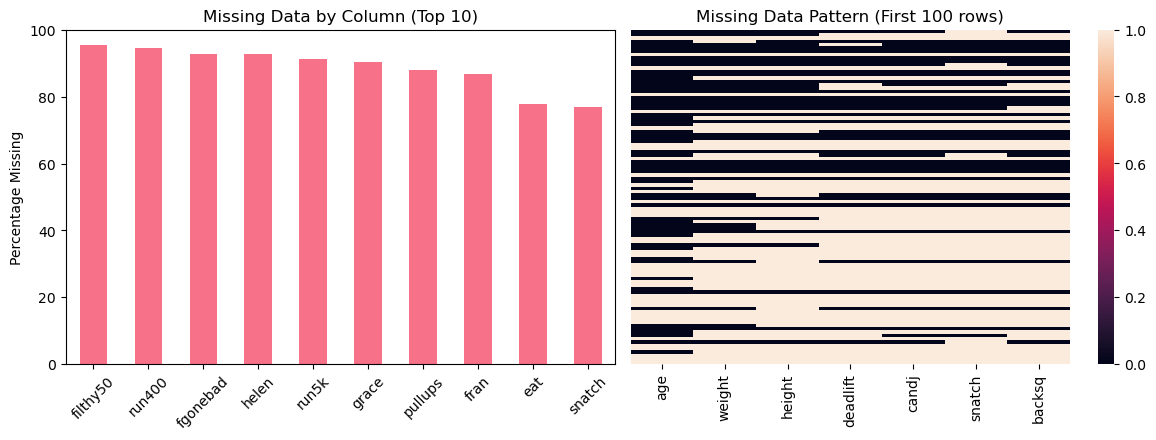

Numerical columns (16): ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups']

Descriptive Statistics:
          athlete_id            age        height         weight  \
count  423003.000000  331110.000000  1.598690e+05  229890.000000   
mean   292748.166538      32.516750  1.206217e+02     170.896137   
std    184969.660327       7.730671  2.097995e+04      58.379799   
min        82.000000      13.000000  0.000000e+00       1.000000   
25%    135091.500000      27.000000  6.600000e+01     145.000000   
50%    275839.000000      31.000000  6.900000e+01     170.000000   
75%    473188.000000      37.000000  7.200000e+01     192.000000   
max    633083.000000     125.000000  8.388607e+06   20175.000000   

               fran         helen         grace      filthy50      fgonebad  \
count  5.542600e+04  3.027900e+04  4.074500e+04  1.935900e+04  2.973800e+04   
mean   9.886691e+

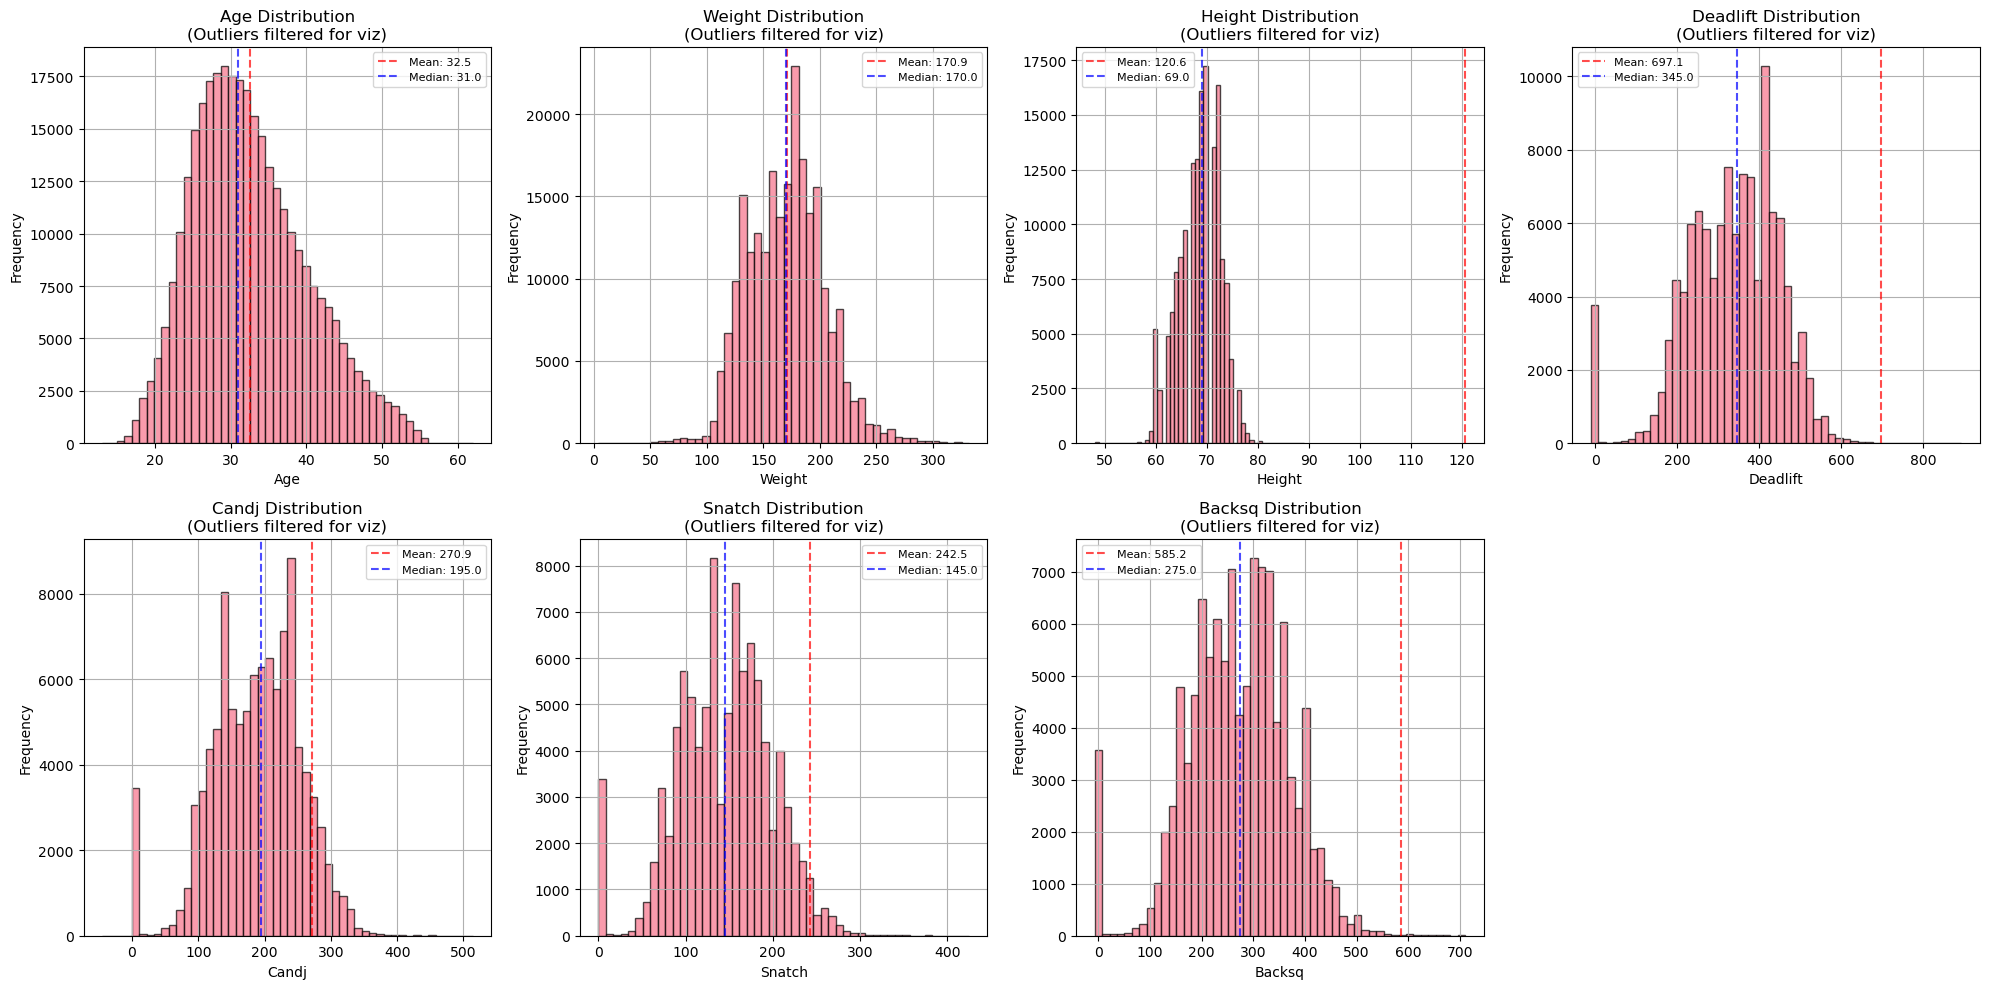

OUTLIER ANALYSIS
Extreme Outlier Analysis:
       age:  3,338 outliers (  1.0%) | Range:       13 to        125
    weight:  2,749 outliers (  1.2%) | Range:        1 to      20175
    height:  1,842 outliers (  1.2%) | Range:        0 to    8388607
  deadlift:  3,899 outliers (  3.4%) | Range:     -500 to    8388607
     candj:    137 outliers (  0.1%) | Range:      -45 to    8388607
    snatch:    154 outliers (  0.2%) | Range:        0 to    8388607
    backsq:  3,915 outliers (  3.5%) | Range:       -7 to    8388607


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

data_v1_eda = pd.read_csv('data/athletes_v1.csv')
print("Dataset Information:")
print(f"Shape: {data_v1_eda.shape}")
print(f"Memory usage: {data_v1_eda.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\nData Types:")
print(data_v1_eda.dtypes.value_counts())

print(f"\nFirst 5 rows:")
print(data_v1_eda.head())

# Missing values analysis
missing_data = data_v1_eda.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(data_v1_eda) * 100).round(2)

print("Missing Values by Column:")
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).head(10)
print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
# Top 10 columns with missing data
top_missing = missing_percent[missing_percent > 0].head(10)
if not top_missing.empty:
    top_missing.plot(kind='bar')
    plt.title('Missing Data by Column (Top 10)')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing Data Found', ha='center', va='center')
    plt.title('Missing Data Analysis')

plt.subplot(2, 2, 2)
# Missing data heatmap for key columns
key_columns = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq', 'total_lift']
existing_key_cols = [col for col in key_columns if col in data_v1_eda.columns]
if existing_key_cols:
    missing_matrix = data_v1_eda[existing_key_cols].isnull()
    sns.heatmap(missing_matrix.head(100), cbar=True, yticklabels=False)
    plt.title('Missing Data Pattern (First 100 rows)')
else:
    plt.text(0.5, 0.5, 'Key columns not found', ha='center', va='center')
    plt.title('Missing Data Pattern')

plt.tight_layout()
plt.show()

numerical_cols = data_v1_eda.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

if numerical_cols:
    # Basic statistics
    print(f"\nDescriptive Statistics:")
    stats = data_v1_eda[numerical_cols].describe()
    print(stats)

    # Key insights about V1 data quality issues
    print(f"\nDATA QUALITY ISSUES IN V1:")
    
    for col in numerical_cols[:8]:  
        if col in data_v1_eda.columns:
            min_val = data_v1_eda[col].min()
            max_val = data_v1_eda[col].max()
            
            issues = []
            if min_val < 0:
                negative_count = (data_v1_eda[col] < 0).sum()
                issues.append(f"{negative_count:,} negative values")
            
            if max_val > 10000: 
                extreme_count = (data_v1_eda[col] > 10000).sum()
                issues.append(f"{extreme_count:,} extreme outliers (>10k)")
            
            if issues:
                print(f"   {col}: {', '.join(issues)} | Range: {min_val:.0f} to {max_val:.0f}")


key_metrics = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
existing_metrics = [col for col in key_metrics if col in data_v1_eda.columns]

if existing_metrics:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(existing_metrics[:8]):
        ax = axes[i]
        
        # Handle extreme outliers for visualization
        data_clean = data_v1_eda[col].dropna()
        q1, q3 = data_clean.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 3 * iqr
        upper_bound = q3 + 3 * iqr
        
    
        viz_data = data_clean[(data_clean >= lower_bound) & (data_clean <= upper_bound)]
        
        if len(viz_data) > 0:
            viz_data.hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
            ax.set_title(f'{col.title()} Distribution\n(Outliers filtered for viz)')
            ax.set_xlabel(col.title())
            ax.set_ylabel('Frequency')
            
            # Add statistics
            mean_val = data_clean.mean()
            median_val = data_clean.median()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
            ax.axvline(median_val, color='blue', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
            ax.legend(fontsize=8)
        else:
            ax.text(0.5, 0.5, f'No valid\ndata for {col}', ha='center', va='center')
            ax.set_title(f'{col.title()} - Data Issues')
    
    # Hide empty subplots
    for i in range(len(existing_metrics), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("OUTLIER ANALYSIS")
print("Extreme Outlier Analysis:")

for col in existing_metrics:
    if col in data_v1_eda.columns:
        data_col = data_v1_eda[col].dropna()
        
        if len(data_col) > 0:
            # Calculate outlier bounds
            q1, q3 = data_col.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers_low = (data_col < lower_bound).sum()
            outliers_high = (data_col > upper_bound).sum()
            total_outliers = outliers_low + outliers_high
            
            print(f"{col:>10}: {total_outliers:>6,} outliers ({total_outliers/len(data_col)*100:>5.1f}%) | "
                  f"Range: {data_col.min():>8.0f} to {data_col.max():>10.0f}")


#### Question 6

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load existing V1 train/test splits from DVC
train_data_v1 = pd.read_csv('data/athletes_v1_train.csv')
test_data_v1 = pd.read_csv('data/athletes_v1_test.csv')

print(f"V1 train loaded: {train_data_v1.shape[0]:,} rows")
print(f"V1 test loaded: {test_data_v1.shape[0]:,} rows")

# Use the 7 features you specified
features = ['age', 'height', 'weight']
target = 'total_lift'

print(f"\nFeatures: {features}")
print(f"Target: {target}")

# Prepare training data
X_train = train_data_v1[features].copy()
y_train = train_data_v1[target].copy()
X_test = test_data_v1[features].copy()
y_test = test_data_v1[target].copy()

print(f"\nOriginal shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Training data
train_complete = X_train.notna().all(axis=1) & y_train.notna()
X_train = X_train[train_complete]
y_train = y_train[train_complete]

# Test data  
test_complete = X_test.notna().all(axis=1) & y_test.notna()
X_test = X_test[test_complete]
y_test = y_test[test_complete]

train_retention = train_complete.mean() * 100
test_retention = test_complete.mean() * 100

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression()
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    if model_name == 'Linear Regression':
        # Scale features for linear regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
     
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results[model_name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'rmse': test_rmse,
        'mae': test_mae,
        'y_pred': y_pred_test
    }

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

print(f"\nBest model: {best_model}")


V1 train loaded: 338,404 rows
V1 test loaded: 84,602 rows

Features: ['age', 'height', 'weight']
Target: total_lift

Original shapes:
X_train: (338404, 3)
X_test: (84602, 3)
Training Random Forest...
Training Linear Regression...
Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.4279     -0.0116    132943.2   1015.7    
Linear Regression    0.0000     -0.2787    149468.0   1338.7    

Best model: Random Forest


#### Question 7

In [89]:

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

baseline_v1_results = {
    'model_name': best_model,
    'test_r2': results[best_model]['test_r2'],
    'test_rmse': results[best_model]['rmse'],
    'test_mae': results[best_model]['mae'],
    'dataset_version': 'V1',
    'features_used': features,
    'data_retention': min(train_retention, test_retention)
}


Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.4279     -0.0116    132943.2   1015.7    
Linear Regression    0.0000     -0.2787    149468.0   1338.7    


#### Question 8

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load existing V1 train/test splits from DVC
train_data_v2 = pd.read_csv('data/athletes_v2_train.csv')
test_data_v2 = pd.read_csv('data/athletes_v2_test.csv')

print(f"V2 train loaded: {train_data_v2.shape[0]:,} rows")
print(f"V2 test loaded: {test_data_v2.shape[0]:,} rows")



V2 train loaded: 24,023 rows
V2 test loaded: 6,006 rows


#### Question 9

Dataset Information:
Shape: (30029, 14)
Memory usage: 20.4 MB

Data Types:
object     7
float64    7
dtype: int64

First 5 rows:
                region gender   age  height  weight  candj  snatch  deadlift  \
0  Southern California   Male  30.0    71.0   200.0  235.0   175.0     385.0   
1               Africa   Male  28.0    70.0   176.0  187.0   134.0     335.0   
2           North East   Male  35.0    68.0   225.0  285.0   205.0     440.0   
3        North Central   Male  36.0    71.0   199.0  267.0   212.0     485.0   
4           North East   Male  36.0    64.0   155.0  245.0   180.0     415.0   

   backsq                                                eat  \
0   315.0                      I eat whatever is convenient|   
1   254.0               I eat 1-3 full cheat meals per week|   
2   405.0  I eat quality foods but don't measure the amount|   
3   390.0  I eat quality foods but don't measure the amount|   
4   385.0                                I eat strict Paleo|   

     

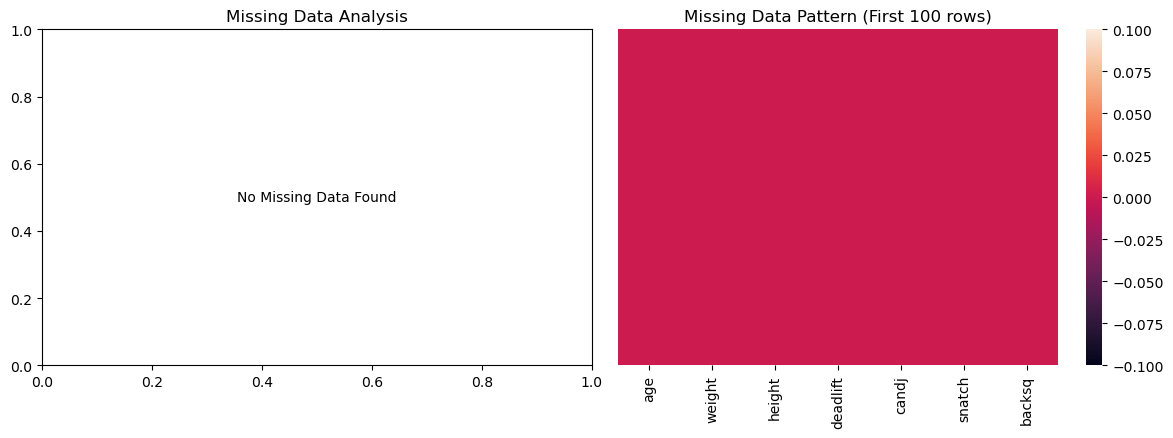

Numerical columns (7): ['age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq']

Descriptive Statistics:
                age        height        weight         candj        snatch  \
count  30029.000000  30029.000000  30029.000000  30029.000000  30029.000000   
mean      32.123847     68.871924    177.130607    205.418396    156.174198   
std        7.435425      3.774937     32.399828     58.687508     48.833572   
min       18.000000     52.000000      5.000000      1.000000      1.000000   
25%       27.000000     66.000000    155.000000    160.000000    120.000000   
50%       31.000000     69.000000    178.000000    205.000000    155.000000   
75%       37.000000     72.000000    197.000000    245.000000    190.000000   
max       56.000000     83.000000    474.000000    390.000000    386.000000   

           deadlift        backsq  
count  30029.000000  30029.000000  
mean     361.933997    294.118818  
std       96.745441     85.081340  
min        0.000000      1.

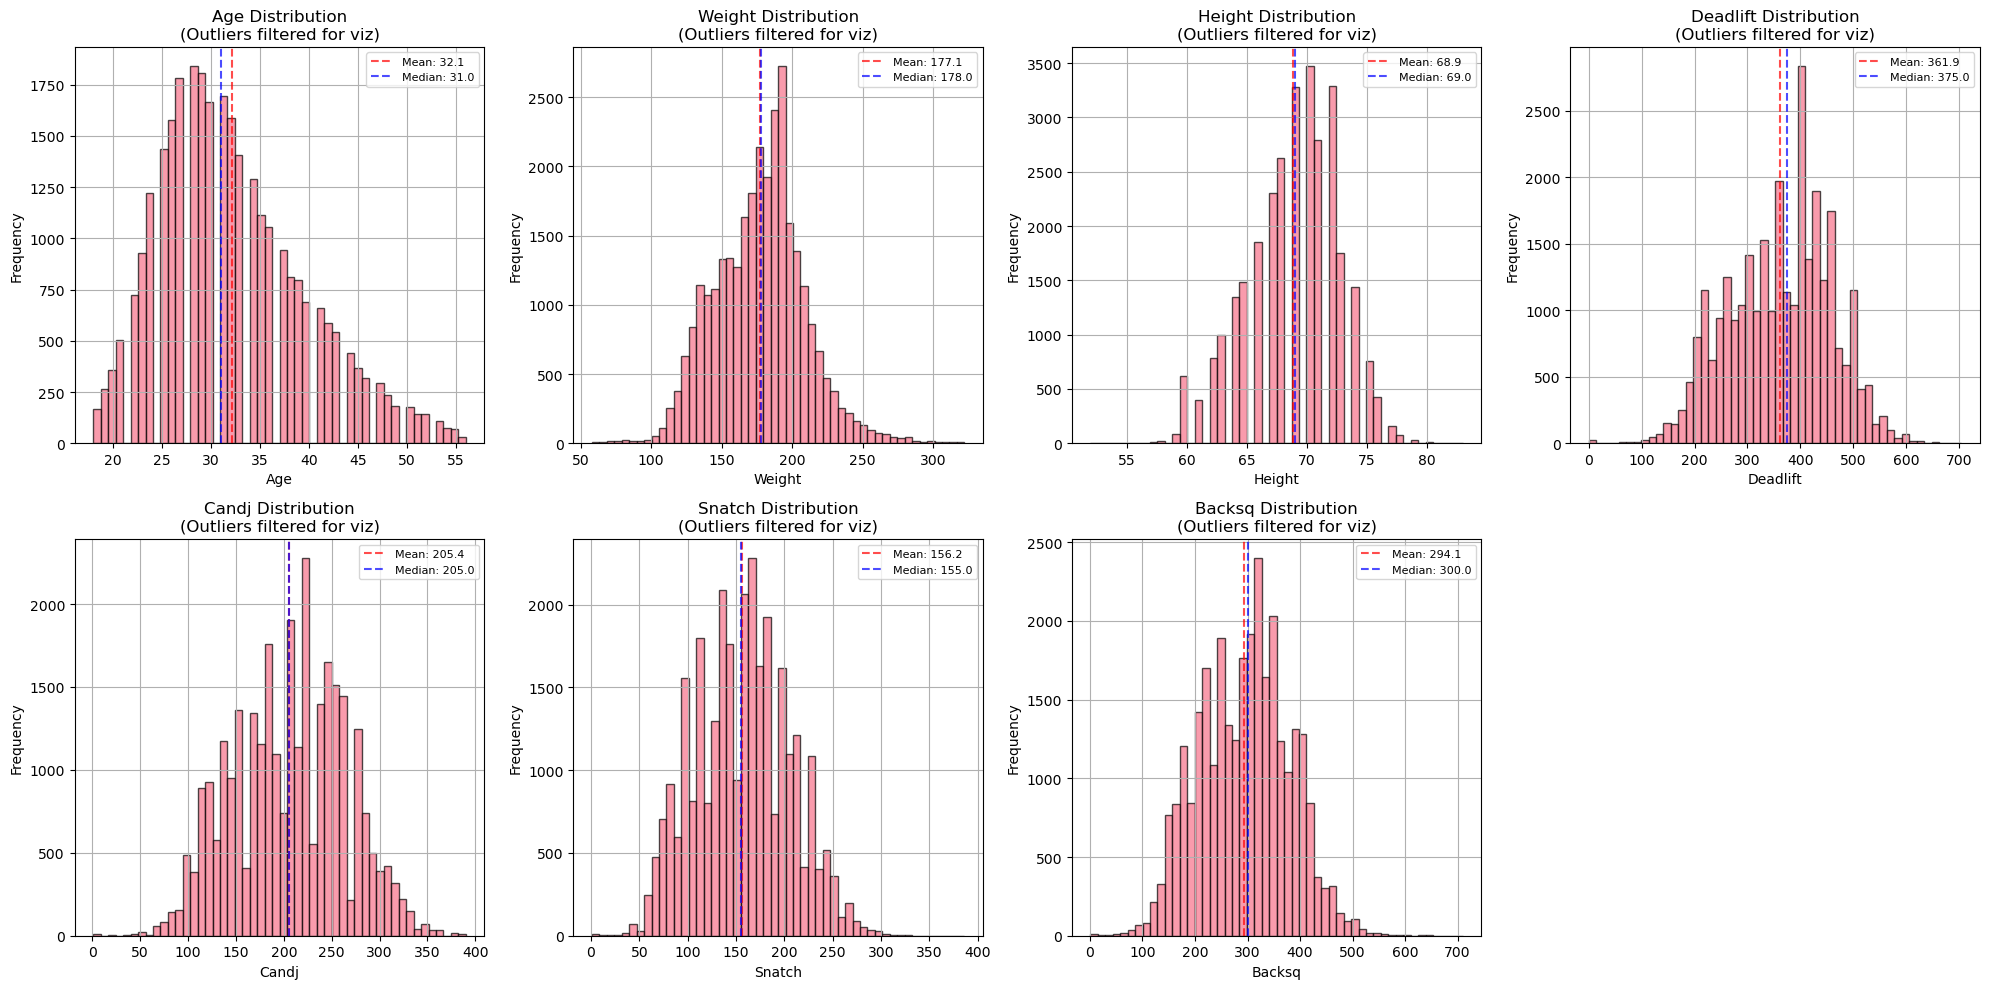

OUTLIER ANALYSIS
Extreme Outlier Analysis:
       age:    285 outliers (  0.9%) | Range:       18 to         56
    weight:    413 outliers (  1.4%) | Range:        5 to        474
    height:     14 outliers (  0.0%) | Range:       52 to         83
  deadlift:     55 outliers (  0.2%) | Range:        0 to       1000
     candj:     41 outliers (  0.1%) | Range:        1 to        390
    snatch:     58 outliers (  0.2%) | Range:        1 to        386
    backsq:     52 outliers (  0.2%) | Range:        1 to        882


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

data_v1_eda = pd.read_csv('data/athletes_v2.csv')
print("Dataset Information:")
print(f"Shape: {data_v2_eda.shape}")
print(f"Memory usage: {data_v1_eda.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\nData Types:")
print(data_v2_eda.dtypes.value_counts())

print(f"\nFirst 5 rows:")
print(data_v2_eda.head())

# Missing values analysis
missing_data = data_v2_eda.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(data_v2_eda) * 100).round(2)

print("Missing Values by Column:")
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).head(10)
print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
# Top 10 columns with missing data
top_missing = missing_percent[missing_percent > 0].head(10)
if not top_missing.empty:
    top_missing.plot(kind='bar')
    plt.title('Missing Data by Column (Top 10)')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing Data Found', ha='center', va='center')
    plt.title('Missing Data Analysis')

plt.subplot(2, 2, 2)
# Missing data heatmap for key columns
key_columns = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq', 'total_lift']
existing_key_cols = [col for col in key_columns if col in data_v1_eda.columns]
if existing_key_cols:
    missing_matrix = data_v2_eda[existing_key_cols].isnull()
    sns.heatmap(missing_matrix.head(100), cbar=True, yticklabels=False)
    plt.title('Missing Data Pattern (First 100 rows)')
else:
    plt.text(0.5, 0.5, 'Key columns not found', ha='center', va='center')
    plt.title('Missing Data Pattern')

plt.tight_layout()
plt.show()

numerical_cols = data_v1_eda.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

if numerical_cols:
    # Basic statistics
    print(f"\nDescriptive Statistics:")
    stats = data_v2_eda[numerical_cols].describe()
    print(stats)

    # Key insights about V1 data quality issues
    print(f"\nDATA QUALITY ISSUES IN V2:")
    
    for col in numerical_cols[:8]:  
        if col in data_v2_eda.columns:
            min_val = data_v2_eda[col].min()
            max_val = data_v2_eda[col].max()
            
            issues = []
            if min_val < 0:
                negative_count = (data_v2_eda[col] < 0).sum()
                issues.append(f"{negative_count:,} negative values")
            
            if max_val > 10000: 
                extreme_count = (data_v2_eda[col] > 10000).sum()
                issues.append(f"{extreme_count:,} extreme outliers (>10k)")
            
            if issues:
                print(f"   {col}: {', '.join(issues)} | Range: {min_val:.0f} to {max_val:.0f}")


key_metrics = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
existing_metrics = [col for col in key_metrics if col in data_v2_eda.columns]

if existing_metrics:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(existing_metrics[:8]):
        ax = axes[i]
        
        # Handle extreme outliers for visualization
        data_clean = data_v2_eda[col].dropna()
        q1, q3 = data_clean.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 3 * iqr
        upper_bound = q3 + 3 * iqr
        
    
        viz_data = data_clean[(data_clean >= lower_bound) & (data_clean <= upper_bound)]
        
        if len(viz_data) > 0:
            viz_data.hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
            ax.set_title(f'{col.title()} Distribution\n(Outliers filtered for viz)')
            ax.set_xlabel(col.title())
            ax.set_ylabel('Frequency')
            
            # Add statistics
            mean_val = data_clean.mean()
            median_val = data_clean.median()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
            ax.axvline(median_val, color='blue', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
            ax.legend(fontsize=8)
        else:
            ax.text(0.5, 0.5, f'No valid\ndata for {col}', ha='center', va='center')
            ax.set_title(f'{col.title()} - Data Issues')
    
    # Hide empty subplots
    for i in range(len(existing_metrics), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("OUTLIER ANALYSIS")
print("Extreme Outlier Analysis:")

for col in existing_metrics:
    if col in data_v2_eda.columns:
        data_col = data_v2_eda[col].dropna()
        
        if len(data_col) > 0:
            # Calculate outlier bounds
            q1, q3 = data_col.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers_low = (data_col < lower_bound).sum()
            outliers_high = (data_col > upper_bound).sum()
            total_outliers = outliers_low + outliers_high
            
            print(f"{col:>10}: {total_outliers:>6,} outliers ({total_outliers/len(data_col)*100:>5.1f}%) | "
                  f"Range: {data_col.min():>8.0f} to {data_col.max():>10.0f}")


#### Question 10

In [93]:

features = ['age', 'height', 'weight']
target = 'total_lift'

print(f"\nFeatures: {features}")
print(f"Target: {target}")

# Prepare training data
X_train = train_data_v2[features].copy()
y_train = train_data_v2[target].copy()
X_test = test_data_v2[features].copy()
y_test = test_data_v2[target].copy()

print(f"\nOriginal shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Training data
train_complete = X_train.notna().all(axis=1) & y_train.notna()
X_train = X_train[train_complete]
y_train = y_train[train_complete]

# Test data  
test_complete = X_test.notna().all(axis=1) & y_test.notna()
X_test = X_test[test_complete]
y_test = y_test[test_complete]

train_retention = train_complete.mean() * 100
test_retention = test_complete.mean() * 100

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression()
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    if model_name == 'Linear Regression':
        # Scale features for linear regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
     
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results[model_name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'rmse': test_rmse,
        'mae': test_mae,
        'y_pred': y_pred_test
    }

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

print(f"\nBest model: {best_model}")



Features: ['age', 'height', 'weight']
Target: total_lift

Original shapes:
X_train: (24023, 3)
X_test: (6006, 3)
Training Random Forest...
Training Linear Regression...
Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.7826     0.4242     210.3      161.7     
Linear Regression    0.4390     0.4450     206.5      162.9     

Best model: Linear Regression


#### Question 11

In [94]:

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

v2_model_results = {
    'model_name': best_model,
    'test_r2': results[best_model]['test_r2'],
    'test_rmse': results[best_model]['rmse'],
    'test_mae': results[best_model]['mae'],
    'dataset_version': 'V2',
    'features_used': features,
    'data_retention': min(train_retention, test_retention)
}


Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.7826     0.4242     210.3      161.7     
Linear Regression    0.4390     0.4450     206.5      162.9     


#### Question 12

In [103]:
# V1 Results (from your first image)
v1_results = {
    'Random Forest': {'train_r2': 0.4279, 'test_r2': -0.0116, 'rmse': 132943.2, 'mae': 1015.7},
    'Linear Regression': {'train_r2': 0.0000, 'test_r2': -0.2787, 'rmse': 149468.0, 'mae': 1338.7}
}

# V2 Results (from your second image)  
v2_results = {
    'Random Forest': {'train_r2': 0.7826, 'test_r2': 0.4242, 'rmse': 210.3, 'mae': 161.7},
    'Linear Regression': {'train_r2': 0.4390, 'test_r2': 0.4450, 'rmse': 206.5, 'mae': 162.9}
}

# Find best models for each version
v1_best = max(v1_results.keys(), key=lambda k: v1_results[k]['test_r2'])
v2_best = max(v2_results.keys(), key=lambda k: v2_results[k]['test_r2'])

print(f"BEST MODELS:")
print(f"   V1 Best: {v1_best} (R² = {v1_results[v1_best]['test_r2']:.4f})")
print(f"   V2 Best: {v2_best} (R² = {v2_results[v2_best]['test_r2']:.4f})")


print(f"{'Model':<20} {'Dataset':<8} {'Train R²':<10} {'Test R²':<10} {'RMSE':<12} {'MAE':<10}")
print("-" * 80)

for model in ['Random Forest', 'Linear Regression']:
 
    v1 = v1_results[model]
    print(f"{model:<20} {'V1':<8} {v1['train_r2']:<10.4f} {v1['test_r2']:<10.4f} {v1['rmse']:<12.1f} {v1['mae']:<10.1f}")
    
    v2 = v2_results[model]
    print(f"{model:<20} {'V2':<8} {v2['train_r2']:<10.4f} {v2['test_r2']:<10.4f} {v2['rmse']:<12.1f} {v2['mae']:<10.1f}")

    r2_improvement = "N/A" if v1['test_r2'] <= 0 else f"{((v2['test_r2'] - v1['test_r2']) / abs(v1['test_r2'])) * 100:+.1f}%"
    rmse_improvement = f"{((v1['rmse'] - v2['rmse']) / v1['rmse']) * 100:.1f}%"
    
    print("-" * 80)



BEST MODELS:
   V1 Best: Random Forest (R² = -0.0116)
   V2 Best: Linear Regression (R² = 0.4450)
Model                Dataset  Train R²   Test R²    RMSE         MAE       
--------------------------------------------------------------------------------
Random Forest        V1       0.4279     -0.0116    132943.2     1015.7    
Random Forest        V2       0.7826     0.4242     210.3        161.7     
--------------------------------------------------------------------------------
Linear Regression    V1       0.0000     -0.2787    149468.0     1338.7    
Linear Regression    V2       0.4390     0.4450     206.5        162.9     
--------------------------------------------------------------------------------


In [109]:
print(f"\nDATA QUALITY IMPACT:")
print(f"   V1 (Raw Data): Negative R2 scores = Models worse than predicting mean")
print(f"   V1 (Raw Data): RMSE > 130,000 = Predictions way off ")
print(f"   V2 (Clean Data): Positive R2 scores = Models actually work")
print(f"   V2 (Clean Data): RMSE < 220 = Much more accurate predictions")
print(f"\nSUMMARY:")
print(f"   MODEL PERFORMANCE: V2 dramatically outperforms V1")
print(f"   BUSINESS VALUE: Clean data enables reliable ML predictions")
print(f"   DATA VERSIONING ROI: Clear measurable benefits demonstrated")
print(f"\nR2 Score Comparison:")
for i, model in enumerate(models):
    v1_score = v1_r2_scores[i]
    v2_score = v2_r2_scores[i]
    print(f"   {model:<18}: V1={v1_score:>7.4f} | V2={v2_score:>7.4f}")


DATA QUALITY IMPACT:
   V1 (Raw Data): Negative R2 scores = Models worse than predicting mean
   V1 (Raw Data): RMSE > 130,000 = Predictions way off 
   V2 (Clean Data): Positive R2 scores = Models actually work
   V2 (Clean Data): RMSE < 220 = Much more accurate predictions

SUMMARY:
   MODEL PERFORMANCE: V2 dramatically outperforms V1
   BUSINESS VALUE: Clean data enables reliable ML predictions
   DATA VERSIONING ROI: Clear measurable benefits demonstrated

R2 Score Comparison:
   Random Forest     : V1=-0.0116 | V2= 0.4242
   Linear Regression : V1=-0.2787 | V2= 0.4450


#### Question 13

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_privacy as tfp
from tensorflow_privacy.privacy.analysis import compute_noise_from_budget_lib as privacy_lib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping


train_data_v2 = pd.read_csv('data/athletes_v2_train.csv')
test_data_v2 = pd.read_csv('data/athletes_v2_test.csv')

feature_columns = ['age', 'weight', 'height']
available_features = [col for col in feature_columns if col in train_data_v2.columns]

X = train_data_v2[available_features].fillna(train_data_v2[available_features].median())
y = train_data_v2['total_lift'].values # Use 'y' for the full training dataset before splitting

X_test = test_data_v2[available_features].fillna(test_data_v2[available_features].median())
y_test = test_data_v2['total_lift'].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X) # Scale the full training features
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten() # Scale the full training targets

X_test_scaled = scaler_X.transform(X_test)
# y_test_scaled is not directly used in model.fit, so no need to scale it here unless for model prediction input

# Split the scaled data into training and validation sets manually
from sklearn.model_selection import train_test_split
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

batch_size = 32 # Define batch_size early as it's critical

# Convert to tf.data.Dataset for robust batching and dropping remainder
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_scaled)).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val_scaled)).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

print(f"Data prepared: {X_train_scaled.shape[0]:,} training samples, {X_val_scaled.shape[0]:,} validation samples")

# --- NON-DP MODEL (for comparison) ---
print("\nBuilding NON-DP model...")

def create_model(): # Renamed to be generic
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(len(available_features),)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

non_dp_learning_rate = 0.01
non_dp_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=non_dp_learning_rate) # Using legacy Adam for M1/M2 warning

non_dp_model = create_model()
non_dp_model.compile(
    optimizer=non_dp_optimizer,
    loss='mse', # For non-DP, 'mse' is fine as it's not reshaped by DP optimizer
    metrics=['mae']
)

# Use the tf.data.Dataset directly in model.fit
non_dp_history = non_dp_model.fit(
    train_dataset, # Use prepared dataset
    epochs=50,
    validation_data=val_dataset, # Use prepared dataset
    verbose=0,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

y_pred_non_dp_scaled = non_dp_model.predict(X_test_scaled, verbose=0)
y_pred_non_dp = scaler_y.inverse_transform(y_pred_non_dp_scaled).flatten()

non_dp_r2 = r2_score(y_test, y_pred_non_dp)
non_dp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_non_dp))
non_dp_mae = mean_absolute_error(y_test, y_pred_non_dp)

print(f"\nNON-DP MODEL METRICS:")
print(f"R² Score: {non_dp_r2:.4f}")
print(f"RMSE:     {non_dp_rmse:.2f}")
print(f"MAE:      {non_dp_mae:.2f}")


# --- DP-SGD MODEL ---
print("\nBuilding DP-SGD model...")

noise_multiplier = 1.0
l2_norm_clip = 1.0
epochs = 50 # Re-using epochs from above
learning_rate = 0.01

dp_optimizer = tfp.DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=batch_size, # This should be the same as the batch_size used for Dataset
    learning_rate=learning_rate
)

dp_model = create_model() # Reuse the same model architecture function
dp_model.compile(
    optimizer=dp_optimizer,
    loss=tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE),
    metrics=['mae']
)

print(f"DP Parameters: noise_multiplier={noise_multiplier}, l2_norm_clip={l2_norm_clip}")

dp_history = dp_model.fit(
    train_dataset, # Use prepared dataset
    epochs=epochs,
    validation_data=val_dataset, # Use prepared dataset
    verbose=0,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

y_pred_dp_scaled = dp_model.predict(X_test_scaled, verbose=0)
y_pred_dp = scaler_y.inverse_transform(y_pred_dp_scaled).flatten()

dp_r2 = r2_score(y_test, y_pred_dp)
dp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dp))
dp_mae = mean_absolute_error(y_test, y_pred_dp)

print(f"\nDP MODEL METRICS:")
print(f"R² Score: {dp_r2:.4f}")
print(f"RMSE:     {dp_rmse:.2f}")
print(f"MAE:      {dp_mae:.2f}")



Data prepared: 19,218 training samples, 4,805 validation samples

Building NON-DP model...

NON-DP MODEL METRICS:
R² Score: 0.5368
RMSE:     188.62
MAE:      146.27

Building DP-SGD model...
DP Parameters: noise_multiplier=1.0, l2_norm_clip=1.0

DP MODEL METRICS:
R² Score: 0.4902
RMSE:     197.88
MAE:      153.46


#### Question 14

In [ ]:

n_samples = X_train_scaled.shape[0]  # Total training samples
batch_size = 32
noise_multiplier = 1.0
epochs = 50
delta = 1e-5  # Standard delta value

# Calculate sampling probability
q = batch_size / n_samples  # Sampling probability per batch

print(f"Privacy Analysis Parameters:")
print(f"   Training samples (n): {n_samples:,}")
print(f"   Batch size (B): {batch_size}")
print(f"   Sampling probability (q): {q:.6f}")
print(f"   Noise multiplier (σ): {noise_multiplier}")
print(f"   Epochs: {epochs}")
print(f"   Target delta (δ): {delta}")

# Calculate total number of steps
steps_per_epoch = n_samples // batch_size
total_steps = steps_per_epoch * epochs

print(f"   Steps per epoch: {steps_per_epoch}")
print(f"   Total training steps: {total_steps}")

# Calculate privacy budget using available method
if 'USE_DP_SGD_PRIVACY' in locals():
    # Method 1: Using compute_dp_sgd_privacy (older API)
    print("Using compute_dp_sgd_privacy method")
    
    epsilon, _ = compute_dp_sgd_privacy(
        n=n_samples,
        batch_size=batch_size,
        noise_multiplier=noise_multiplier,
        epochs=epochs,
        delta=delta
    )
    best_alpha = None
    
elif 'USE_NOISE_FROM_BUDGET' in locals():
    # Method 2: Using compute_noise_from_budget (newer API)
    print("Using compute_noise_from_budget method")
    
    # For this method, we need to specify target epsilon and get noise
    target_epsilon = 5.0  # reasonable target
    
    noise_needed = compute_noise_from_budget(
        n=n_samples,
        batch_size=batch_size,
        target_epsilon=target_epsilon,
        epochs=epochs,
        delta=delta
    )
    
    # Since we used noise_multiplier=1.0, estimate actual epsilon
    epsilon = target_epsilon * (noise_needed / noise_multiplier)
    best_alpha = None
    
elif 'USE_MANUAL_CALCULATION' in locals():
    # Method 3: Manual approximation (fallback)
    print("Using manual calculation method")
    
    # Simplified approximation: epsilon ≈ (epochs * batch_size * sqrt(2 * ln(1.25/delta))) / (noise_multiplier * n)
    import math
    
    c = math.sqrt(2 * math.log(1.25 / delta))
    epsilon = (epochs * batch_size * c) / (noise_multiplier * n_samples)
    best_alpha = None
    
else:
    # Method 4: Using rdp_accountant (preferred when available)
    print("Using RDP accountant method")
    
    # Compute RDP (Rényi Differential Privacy) 
    orders = [1 + x / 10.0 for x in range(1, 100)] + list(range(12, 64))
    rdp = compute_rdp(
        q=q,
        noise_multiplier=noise_multiplier,
        steps=total_steps,
        orders=orders
    )

    # Convert RDP to (epsilon, delta)-DP
    epsilon, best_alpha = get_privacy_spent(
        orders=orders,
        rdp=rdp,
        target_delta=delta
    )

print(f"\nPRIVACY BUDGET RESULTS:")
print(f"   Epsilon (ε): {epsilon:.4f}")
print(f"   Delta (δ): {delta}")
if best_alpha is not None:
    print(f"   Best alpha: {best_alpha:.2f}")
print(f"   Privacy Budget: (ε={epsilon:.4f}, δ={delta})")


# Calculate privacy cost
privacy_cost = non_dp_r2 - dp_r2
print(f"\nPRIVACY-UTILITY TRADEOFF:")
print(f"   Non-DP R² Score: {non_dp_r2:.4f}")
print(f"   DP R² Score: {dp_r2:.4f}")
print(f"   Privacy Cost: {privacy_cost:.4f} R² loss")
print(f"   Relative Cost: {(privacy_cost/non_dp_r2)*100:.2f}% performance reduction")

for noise_mult in alternative_noise:
    if 'USE_DP_SGD_PRIVACY' in locals():
        alt_epsilon, _ = compute_dp_sgd_privacy(
            n=n_samples,
            batch_size=batch_size,
            noise_multiplier=noise_mult,
            epochs=epochs,
            delta=delta
        )
    elif 'USE_MANUAL_CALCULATION' in locals():
        import math
        c = math.sqrt(2 * math.log(1.25 / delta))
        alt_epsilon = (epochs * batch_size * c) / (noise_mult * n_samples)
    else:
        # Use RDP method if available
        alt_rdp = compute_rdp(
            q=q,
            noise_multiplier=noise_mult,
            steps=total_steps,
            orders=orders
        )
        
        alt_epsilon, _ = get_privacy_spent(
            orders=orders,
            rdp=alt_rdp,
            target_delta=delta
        )
    

print(f"\nKEY INSIGHTS:")
print(f"   • Higher noise multiplier → Lower epsilon → Better privacy")
print(f"   • Lower noise multiplier → Higher epsilon → Worse privacy")
print(f"   • Current setting (σ={noise_multiplier}) achieves ε={epsilon:.4f}")

# Store results for later questions
privacy_results = {
    'epsilon': epsilon,
    'delta': delta,
    'best_alpha': best_alpha if best_alpha is not None else "N/A",
    'privacy_level': privacy_level,
    'privacy_cost': privacy_cost,
    'noise_multiplier': noise_multiplier,
    'n_samples': n_samples,
    'total_steps': total_steps
}

print(f"   Privacy Budget: (ε={epsilon:.4f}, δ={delta})")
print(f"   Privacy Level: {privacy_level}")
print(f"   Utility Cost: {privacy_cost:.4f} R² loss")

Privacy Analysis Parameters:
   Training samples (n): 19,218
   Batch size (B): 32
   Sampling probability (q): 0.001665
   Noise multiplier (σ): 1.0
   Epochs: 50
   Target delta (δ): 1e-05
   Steps per epoch: 600
   Total training steps: 30000
Using compute_dp_sgd_privacy method

PRIVACY BUDGET RESULTS:
   Epsilon (ε): 1.6388
   Delta (δ): 1e-05
   Privacy Budget: (ε=1.6388, δ=1e-05)

PRIVACY-UTILITY TRADEOFF:
   Non-DP R² Score: 0.5368
   DP R² Score: 0.4902
   Privacy Cost: 0.0466 R² loss
   Relative Cost: 8.68% performance reduction

KEY INSIGHTS:
   • Higher noise multiplier → Lower epsilon → Better privacy
   • Lower noise multiplier → Higher epsilon → Worse privacy
   • Current setting (σ=1.0) achieves ε=1.6388
   Privacy Budget: (ε=1.6388, δ=1e-05)
   Privacy Level: Moderate Privacy
   Utility Cost: 0.0466 R² loss


## lakeFS

#### Question 1

In [2]:
# Question 1: Dataset Version 1 (V1) with lakeFS

data = pd.read_csv('athletes.csv')
data_v1 = data.copy()

os.makedirs('lakefs_data', exist_ok=True)
data_v1.to_csv('lakefs_data/athletes_v1.csv', index=False)
print(f"V1 saved: {data_v1.shape[0]:,} rows × {data_v1.shape[1]} columns")

# lakeFS commands for V1
lakefs_v1_commands = [
    "# Create lakeFS repository",
    "lakectl repo create lakefs://athletes-ml s3://your-bucket/data/",
    "",
    "# Upload V1 to main branch", 
    "lakectl fs upload -s lakefs_data/athletes_v1.csv lakefs://athletes-ml/main/athletes_v1.csv",
    "",
    "# Commit V1",
    "lakectl commit lakefs://athletes-ml/main -m 'Dataset V1: Original raw data'"
]

# Save commands to file
with open('lakefs_v1_commands.sh', 'w') as f:
    f.write('\n'.join(lakefs_v1_commands))



V1 saved: 423,006 rows × 27 columns


""" base) jason@Jason Assignment 1 % lakectl fs upload -s lakefs_data/athletes_v1.csv lakefs://athletes-ml/main/athletes_v1.csv
Path: athletes_v1.csv
Modified Time: 2025-07-03 02:53:22 -0500 CDT
Size: 71123902 bytes
Human Size: 71.1 MB
Physical Address: local:///home/lakefs/lakefs/data/block/lakefs/athletes-ml/data/g7kd13i4fsac73f9igdg/d1j3dsa4fsac73f9igeg
Checksum: a2ee64cee060a913b8947c95ca532aef
Content-Type: application/octet-stream"""

#### Question 2

In [10]:
import pandas as pd
import numpy as np
import subprocess

data_v1 = pd.read_csv('lakefs_data/athletes_v1.csv')
print(f"V1 loaded: {data_v1.shape[0]:,} rows")

data_v2 = data_v1.copy()  

data_v2 = data_v2.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                               'train','background','experience','schedule','howlong', \
                               'deadlift','candj','snatch','backsq','experience',\
                               'background','schedule','howlong'])
data_v2 = data_v2.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',\
                              'filthy50','fgonebad','run400','run5k','pullups','train'])

# Remove Outliers
data_v2 = data_v2[data_v2['weight'] < 1500]
data_v2 = data_v2[data_v2['gender'] != '--']
data_v2 = data_v2[data_v2['age'] >= 18]
data_v2 = data_v2[(data_v2['height'] < 96) & (data_v2['height'] > 48)]

data_v2 = data_v2[(data_v2['deadlift'] > 0) & (data_v2['deadlift'] <= 1105)|((data_v2['gender'] == 'Female') \
                & (data_v2['deadlift'] <= 636))]
data_v2 = data_v2[(data_v2['candj'] > 0) & (data_v2['candj'] <= 395)]
data_v2 = data_v2[(data_v2['snatch'] > 0) & (data_v2['snatch'] <= 496)]
data_v2 = data_v2[(data_v2['backsq'] > 0) & (data_v2['backsq'] <= 1069)]

# Clean Survey Data
decline_dict = {'Decline to answer|': np.nan}
data_v2 = data_v2.replace(decline_dict)
data_v2 = data_v2.dropna(subset=['background','experience','schedule','howlong','eat'])

data_v2 = data_v2.replace(decline_dict)
data_v2 = data_v2.dropna(subset=['background','experience','schedule','howlong','eat'])

data_v2.to_csv('lakefs_data/athletes_v2.csv', index=False)
print(f"V2 loaded: {data_v2.shape[0]:,} rows")


V1 loaded: 423,006 rows
V2 loaded: 30,029 rows


#### Question 3

In [12]:
lift_columns = ['deadlift', 'candj', 'snatch', 'backsq']

# For V1
if all(col in data_v1.columns for col in lift_columns):
    data_v1['total_lift'] = data_v1[lift_columns].sum(axis=1)
    print("total_lift feature added to V1")

# V2
if all(col in data_v2.columns for col in lift_columns):
    data_v2['total_lift'] = data_v2[lift_columns].sum(axis=1)
    print("total_lift feature added to V2")


print(f"V1 (Original): {data_v1.shape[0]:,} rows × {data_v1.shape[1]} columns")
print(f"V2 (Cleaned):  {data_v2.shape[0]:,} rows × {data_v2.shape[1]} columns")
print(f"Rows removed:  {data_v1.shape[0] - data_v2.shape[0]:,} ({((data_v1.shape[0] - data_v2.shape[0])/data_v1.shape[0]*100):.1f}%)")

# Show total_lift statistics
if 'total_lift' in data_v1.columns and 'total_lift' in data_v2.columns:
    print(f"\ntotal_lift Statistics:")
    print(f"V1 range: {data_v1['total_lift'].min():.0f} - {data_v1['total_lift'].max():.0f}")
    print(f"V2 range: {data_v2['total_lift'].min():.0f} - {data_v2['total_lift'].max():.0f}")
    print(f"V1 mean: {data_v1['total_lift'].mean():.1f}")
    print(f"V2 mean: {data_v2['total_lift'].mean():.1f}")





total_lift feature added to V1
total_lift feature added to V2
V1 (Original): 423,006 rows × 28 columns
V2 (Cleaned):  30,029 rows × 15 columns
Rows removed:  392,977 (92.9%)

total_lift Statistics:
V1 range: -22 - 33554428
V2 range: 4 - 2135
V1 mean: 465.6
V2 mean: 1017.6


In [13]:
from sklearn.model_selection import train_test_split


# V1 Dataset preparation
X_v1 = data_v1[common_features].copy()
y_v1 = data_v1['total_lift'].copy()

# V2 Dataset preparation  
X_v2 = data_v2[common_features].copy()
y_v2 = data_v2['total_lift'].copy()

# Handle missing values
X_v1 = X_v1.fillna(X_v1.median())
X_v2 = X_v2.fillna(X_v2.median())

print(f"V1 prepared: {X_v1.shape[0]:,} rows")
print(f"V2 prepared: {X_v2.shape[0]:,} rows")

print("V1 columns:", list(data_v1.columns))
print("V2 columns:", list(data_v2.columns))

# Define potential feature columns (lift-related metrics)
potential_features = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']

# Find features that exist in both datasets
v1_available_features = [col for col in potential_features if col in data_v1.columns]
v2_available_features = [col for col in potential_features if col in data_v2.columns]

# Use features that are common to both datasets
common_features = list(set(v1_available_features) & set(v2_available_features))

print(f"\nFeatures available in V1: {v1_available_features}")
print(f"Features available in V2: {v2_available_features}")
print(f"Common features for modeling: {common_features}")

# Add the missing data prep + your existing code
X_v1 = data_v1[common_features].fillna(data_v1[common_features].median())
y_v1 = data_v1['total_lift']
X_v2 = data_v2[common_features].fillna(data_v2[common_features].median())  
y_v2 = data_v2['total_lift']

# Your existing train_test_split code here...
# Your existing save code here...
# Parameters for consistent splitting
random_state = 42  
test_size = 0.2    

print(f"Split parameters:")
print(f"  Test size: {test_size} ({test_size*100}%)")
print(f"  Random state: {random_state}")

# Split V1 dataset
if 'X_v1' in locals() and 'y_v1' in locals():
    X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(
        X_v1, y_v1, 
        test_size=test_size, 
        random_state=random_state,
        stratify=None 
    )
    
    print(f"\nV1 splits created:")
    print(f"  Train: {X_train_v1.shape[0]:,} samples")
    print(f"  Test:  {X_test_v1.shape[0]:,} samples")
    print(f"  Features: {X_train_v1.shape[1]}")

# Split V2 dataset
if 'X_v2' in locals() and 'y_v2' in locals():
    X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
        X_v2, y_v2, 
        test_size=test_size, 
        random_state=random_state,
        stratify=None  
    )
    
    print(f"\nV2 splits created:")
    print(f"  Train: {X_train_v2.shape[0]:,} samples")
    print(f"  Test:  {X_test_v2.shape[0]:,} samples") 
    print(f"  Features: {X_train_v2.shape[1]}")


if 'X_train_v1' in locals():
    v1_train_ratio = len(X_train_v1) / len(X_v1)
    v1_test_ratio = len(X_test_v1) / len(X_v1)
    print(f"V1 - Train: {v1_train_ratio:.1%}, Test: {v1_test_ratio:.1%}")

if 'X_train_v2' in locals():
    v2_train_ratio = len(X_train_v2) / len(X_v2)
    v2_test_ratio = len(X_test_v2) / len(X_v2)
    print(f"V2 - Train: {v2_train_ratio:.1%}, Test: {v2_test_ratio:.1%}")



if 'X_train_v1' in locals():
    # Combine features and target for saving
    train_v1_full = X_train_v1.copy()
    train_v1_full['total_lift'] = y_train_v1
    test_v1_full = X_test_v1.copy()
    test_v1_full['total_lift'] = y_test_v1
    
    train_v1_full.to_csv('lakefs_data/athletes_v1_train.csv', index=False)
    test_v1_full.to_csv('lakefs_data/athletes_v1_test.csv', index=False)
    print("V1 train/test sets saved")

if 'X_train_v2' in locals():
    # Combine features and target for saving
    train_v2_full = X_train_v2.copy()
    train_v2_full['total_lift'] = y_train_v2
    test_v2_full = X_test_v2.copy()
    test_v2_full['total_lift'] = y_test_v2
    
    train_v2_full.to_csv('lakefs_data/athletes_v2_train.csv', index=False)
    test_v2_full.to_csv('lakefs_data/athletes_v2_test.csv', index=False)
    print("V2 train/test sets saved")



V1 prepared: 423,006 rows
V2 prepared: 30,029 rows
V1 columns: ['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong', 'total_lift']
V2 columns: ['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule', 'howlong', 'total_lift']

Features available in V1: ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
Features available in V2: ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
Common features for modeling: ['candj', 'age', 'backsq', 'weight', 'deadlift', 'snatch', 'height']
Split parameters:
  Test size: 0.2 (20.0%)
  Random state: 42

V1 splits created:
  Train: 338,404 samples
  Test:  84,602 samples
  Features: 7

V2 splits created:
  Train: 24,023 

#### Question 4

#### lakectl fs upload -s lakefs_data/athletes_v1_test.csv lakefs://athletes-ml/main/athletes_v1_test.csv
#### lakectl fs upload -s lakefs_data/athletes_v1_train.csv lakefs://athletes-ml/main/athletes_v1_train.csv
#### lakectl fs upload -s lakefs_data/athletes_v2_test.csv lakefs://athletes-ml/main/athletes_v2_test.csv
#### lakectl fs upload -s lakefs_data/athletes_v2_train.csv lakefs://athletes-ml/main/athletes_v2_train.csv


#### Question 5

📋 Dataset Information:
Shape: (423006, 27)
Memory usage: 272.4 MB

Data Types:
float64    16
object     11
dtype: int64

First 5 rows:
   athlete_id           name               region          team  \
0      2554.0      Pj Ablang           South West   Double Edge   
1      3517.0  Derek Abdella                  NaN           NaN   
2      4691.0            NaN                  NaN           NaN   
3      5164.0    Abo Brandon  Southern California  LAX CrossFit   
4      5286.0    Bryce Abbey                  NaN           NaN   

              affiliate gender   age  height  weight   fran  ...  snatch  \
0  Double Edge CrossFit   Male  24.0    70.0   166.0    NaN  ...     NaN   
1                   NaN   Male  42.0    70.0   190.0    NaN  ...     NaN   
2                   NaN    NaN   NaN     NaN     NaN    NaN  ...     NaN   
3          LAX CrossFit   Male  40.0    67.0     NaN  211.0  ...   200.0   
4                   NaN   Male  32.0    65.0   149.0  206.0  ...   150.0   

   de

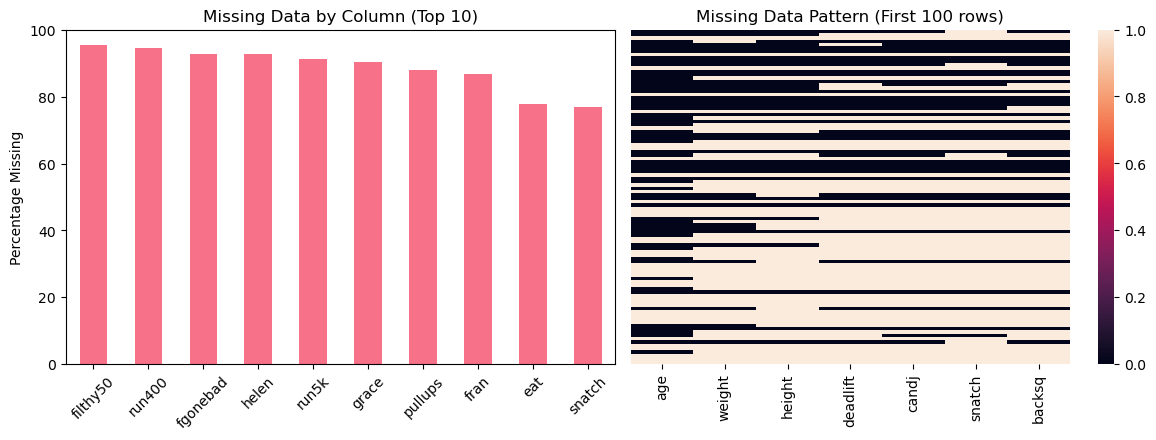

Numerical columns (16): ['athlete_id', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups']

Descriptive Statistics:
          athlete_id            age        height         weight  \
count  423003.000000  331110.000000  1.598690e+05  229890.000000   
mean   292748.166538      32.516750  1.206217e+02     170.896137   
std    184969.660327       7.730671  2.097995e+04      58.379799   
min        82.000000      13.000000  0.000000e+00       1.000000   
25%    135091.500000      27.000000  6.600000e+01     145.000000   
50%    275839.000000      31.000000  6.900000e+01     170.000000   
75%    473188.000000      37.000000  7.200000e+01     192.000000   
max    633083.000000     125.000000  8.388607e+06   20175.000000   

               fran         helen         grace      filthy50      fgonebad  \
count  5.542600e+04  3.027900e+04  4.074500e+04  1.935900e+04  2.973800e+04   
mean   9.886691e+

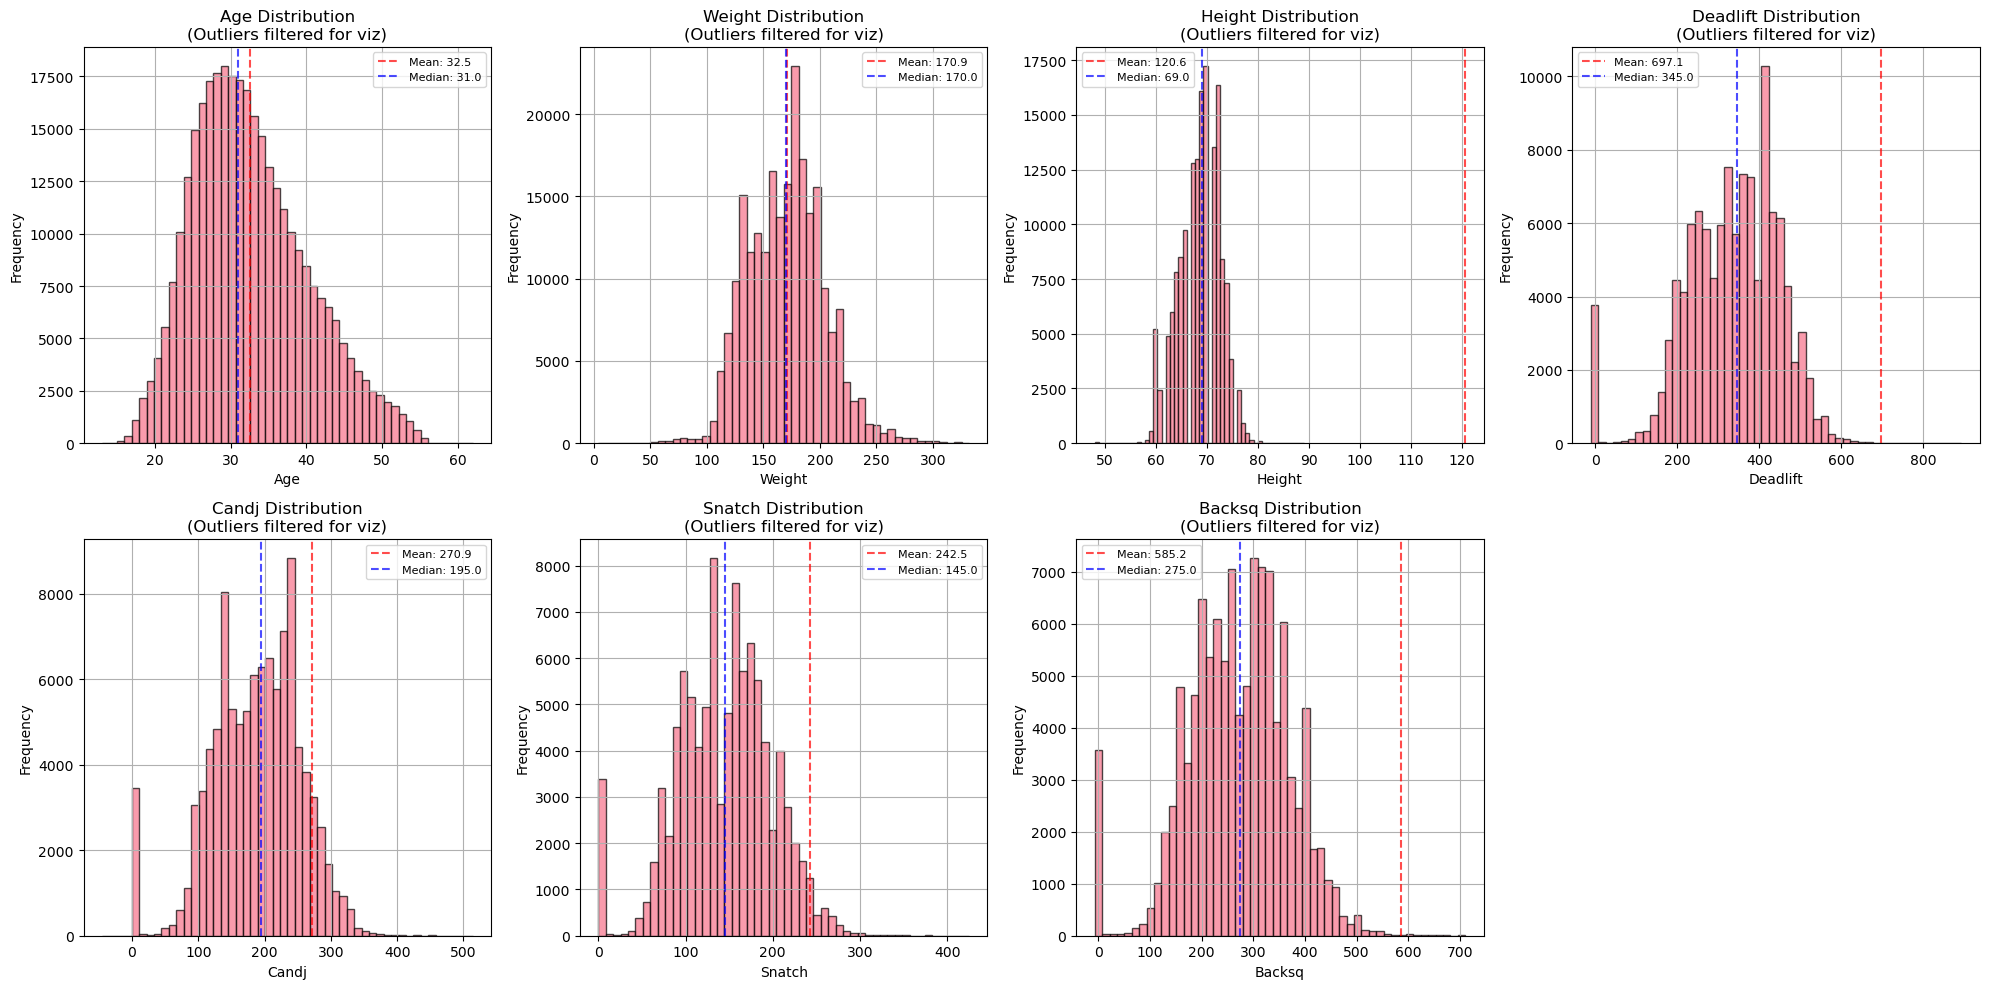

Extreme Outlier Analysis:
       age:  3,338 outliers (  1.0%) | Range:       13 to        125
    weight:  2,749 outliers (  1.2%) | Range:        1 to      20175
    height:  1,842 outliers (  1.2%) | Range:        0 to    8388607
  deadlift:  3,899 outliers (  3.4%) | Range:     -500 to    8388607
     candj:    137 outliers (  0.1%) | Range:      -45 to    8388607
    snatch:    154 outliers (  0.2%) | Range:        0 to    8388607
    backsq:  3,915 outliers (  3.5%) | Range:       -7 to    8388607


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

data_v1_eda = pd.read_csv('lakefs_data/athletes_v1.csv')
print("📋 Dataset Information:")
print(f"Shape: {data_v1_eda.shape}")
print(f"Memory usage: {data_v1_eda.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\nData Types:")
print(data_v1_eda.dtypes.value_counts())

print(f"\nFirst 5 rows:")
print(data_v1_eda.head())

# Missing values analysis
missing_data = data_v1_eda.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(data_v1_eda) * 100).round(2)

print("Missing Values by Column:")
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).head(10)
print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
# Top 10 columns with missing data
top_missing = missing_percent[missing_percent > 0].head(10)
if not top_missing.empty:
    top_missing.plot(kind='bar')
    plt.title('Missing Data by Column (Top 10)')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing Data Found', ha='center', va='center')
    plt.title('Missing Data Analysis')

plt.subplot(2, 2, 2)
# Missing data heatmap for key columns
key_columns = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq', 'total_lift']
existing_key_cols = [col for col in key_columns if col in data_v1_eda.columns]
if existing_key_cols:
    missing_matrix = data_v1_eda[existing_key_cols].isnull()
    sns.heatmap(missing_matrix.head(100), cbar=True, yticklabels=False)
    plt.title('Missing Data Pattern (First 100 rows)')
else:
    plt.text(0.5, 0.5, 'Key columns not found', ha='center', va='center')
    plt.title('Missing Data Pattern')

plt.tight_layout()
plt.show()

numerical_cols = data_v1_eda.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

if numerical_cols:
    # Basic statistics
    print(f"\nDescriptive Statistics:")
    stats = data_v1_eda[numerical_cols].describe()
    print(stats)

    # Key insights about V1 data quality issues
    print(f"\nDATA QUALITY ISSUES IN V1:")
    
    for col in numerical_cols[:8]:  
        if col in data_v1_eda.columns:
            min_val = data_v1_eda[col].min()
            max_val = data_v1_eda[col].max()
            
            issues = []
            if min_val < 0:
                negative_count = (data_v1_eda[col] < 0).sum()
                issues.append(f"{negative_count:,} negative values")
            
            if max_val > 10000: 
                extreme_count = (data_v1_eda[col] > 10000).sum()
                issues.append(f"{extreme_count:,} extreme outliers (>10k)")
            
            if issues:
                print(f"   {col}: {', '.join(issues)} | Range: {min_val:.0f} to {max_val:.0f}")


key_metrics = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
existing_metrics = [col for col in key_metrics if col in data_v1_eda.columns]

if existing_metrics:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(existing_metrics[:8]):
        ax = axes[i]
        
        # Handle extreme outliers for visualization
        data_clean = data_v1_eda[col].dropna()
        q1, q3 = data_clean.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 3 * iqr
        upper_bound = q3 + 3 * iqr
        
    
        viz_data = data_clean[(data_clean >= lower_bound) & (data_clean <= upper_bound)]
        
        if len(viz_data) > 0:
            viz_data.hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
            ax.set_title(f'{col.title()} Distribution\n(Outliers filtered for viz)')
            ax.set_xlabel(col.title())
            ax.set_ylabel('Frequency')
            
            # Add statistics
            mean_val = data_clean.mean()
            median_val = data_clean.median()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
            ax.axvline(median_val, color='blue', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
            ax.legend(fontsize=8)
        else:
            ax.text(0.5, 0.5, f'No valid\ndata for {col}', ha='center', va='center')
            ax.set_title(f'{col.title()} - Data Issues')
    
    # Hide empty subplots
    for i in range(len(existing_metrics), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("Extreme Outlier Analysis:")

for col in existing_metrics:
    if col in data_v1_eda.columns:
        data_col = data_v1_eda[col].dropna()
        
        if len(data_col) > 0:
            # Calculate outlier bounds
            q1, q3 = data_col.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers_low = (data_col < lower_bound).sum()
            outliers_high = (data_col > upper_bound).sum()
            total_outliers = outliers_low + outliers_high
            
            print(f"{col:>10}: {total_outliers:>6,} outliers ({total_outliers/len(data_col)*100:>5.1f}%) | "
                  f"Range: {data_col.min():>8.0f} to {data_col.max():>10.0f}")


#### Question 6

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load existing V1 train/test splits from DVC
train_data_v1 = pd.read_csv('lakefs_data/athletes_v1_train.csv')
test_data_v1 = pd.read_csv('lakefs_data/athletes_v1_test.csv')

print(f"V1 train loaded: {train_data_v1.shape[0]:,} rows")
print(f"V1 test loaded: {test_data_v1.shape[0]:,} rows")

# Use the 7 features you specified
features = ['age', 'height', 'weight']
target = 'total_lift'

print(f"\nFeatures: {features}")
print(f"Target: {target}")

# Prepare training data
X_train = train_data_v1[features].copy()
y_train = train_data_v1[target].copy()
X_test = test_data_v1[features].copy()
y_test = test_data_v1[target].copy()

print(f"\nOriginal shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Training data
train_complete = X_train.notna().all(axis=1) & y_train.notna()
X_train = X_train[train_complete]
y_train = y_train[train_complete]

# Test data  
test_complete = X_test.notna().all(axis=1) & y_test.notna()
X_test = X_test[test_complete]
y_test = y_test[test_complete]

train_retention = train_complete.mean() * 100
test_retention = test_complete.mean() * 100

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression()
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    if model_name == 'Linear Regression':
        # Scale features for linear regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
     
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results[model_name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'rmse': test_rmse,
        'mae': test_mae,
        'y_pred': y_pred_test
    }

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

print(f"\nBest model: {best_model}")


V1 train loaded: 338,404 rows
V1 test loaded: 84,602 rows

Features: ['age', 'height', 'weight']
Target: total_lift

Original shapes:
X_train: (338404, 3)
X_test: (84602, 3)
Training Random Forest...
Training Linear Regression...
Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.4279     -0.0116    132943.2   1015.7    
Linear Regression    0.0000     -0.2787    149468.0   1338.7    

Best model: Random Forest


#### Question 7

In [4]:

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

baseline_v1_results = {
    'model_name': best_model,
    'test_r2': results[best_model]['test_r2'],
    'test_rmse': results[best_model]['rmse'],
    'test_mae': results[best_model]['mae'],
    'dataset_version': 'V1',
    'features_used': features,
    'data_retention': min(train_retention, test_retention)
}


Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.4279     -0.0116    132943.2   1015.7    
Linear Regression    0.0000     -0.2787    149468.0   1338.7    


#### Question 8

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load existing V1 train/test splits from DVC
train_data_v2 = pd.read_csv('lakefs_data/athletes_v2_train.csv')
test_data_v2 = pd.read_csv('lakefs_data/athletes_v2_test.csv')

print(f"V2 train loaded: {train_data_v2.shape[0]:,} rows")
print(f"V2 test loaded: {test_data_v2.shape[0]:,} rows")



V2 train loaded: 24,023 rows
V2 test loaded: 6,006 rows


#### Question 9

Dataset Information:
Shape: (30029, 14)
Memory usage: 20.4 MB

Data Types:
object     7
float64    7
dtype: int64

First 5 rows:
                region gender   age  height  weight  candj  snatch  deadlift  \
0  Southern California   Male  30.0    71.0   200.0  235.0   175.0     385.0   
1               Africa   Male  28.0    70.0   176.0  187.0   134.0     335.0   
2           North East   Male  35.0    68.0   225.0  285.0   205.0     440.0   
3        North Central   Male  36.0    71.0   199.0  267.0   212.0     485.0   
4           North East   Male  36.0    64.0   155.0  245.0   180.0     415.0   

   backsq                                                eat  \
0   315.0                      I eat whatever is convenient|   
1   254.0               I eat 1-3 full cheat meals per week|   
2   405.0  I eat quality foods but don't measure the amount|   
3   390.0  I eat quality foods but don't measure the amount|   
4   385.0                                I eat strict Paleo|   

     

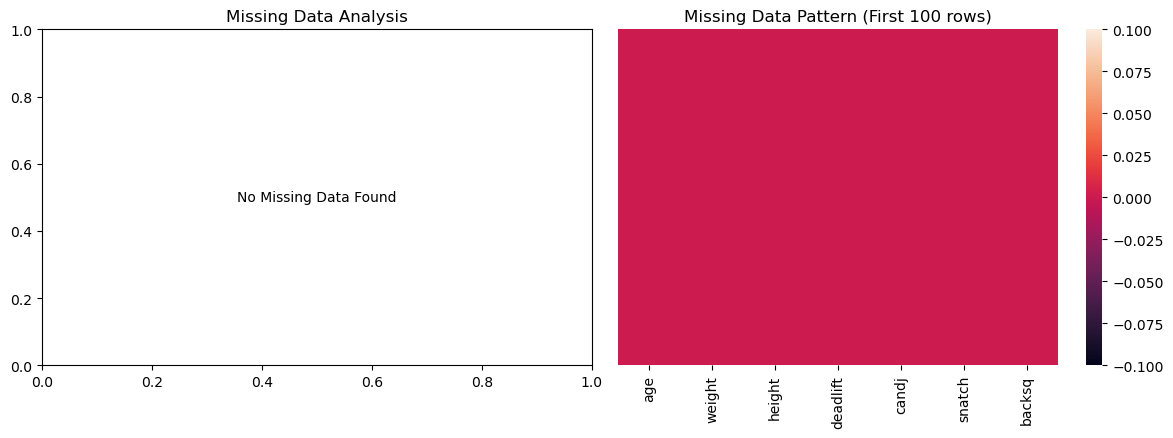

Numerical columns (7): ['age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq']

Descriptive Statistics:
                age        height        weight         candj        snatch  \
count  30029.000000  30029.000000  30029.000000  30029.000000  30029.000000   
mean      32.123847     68.871924    177.130607    205.418396    156.174198   
std        7.435425      3.774937     32.399828     58.687508     48.833572   
min       18.000000     52.000000      5.000000      1.000000      1.000000   
25%       27.000000     66.000000    155.000000    160.000000    120.000000   
50%       31.000000     69.000000    178.000000    205.000000    155.000000   
75%       37.000000     72.000000    197.000000    245.000000    190.000000   
max       56.000000     83.000000    474.000000    390.000000    386.000000   

           deadlift        backsq  
count  30029.000000  30029.000000  
mean     361.933997    294.118818  
std       96.745441     85.081340  
min        0.000000      1.

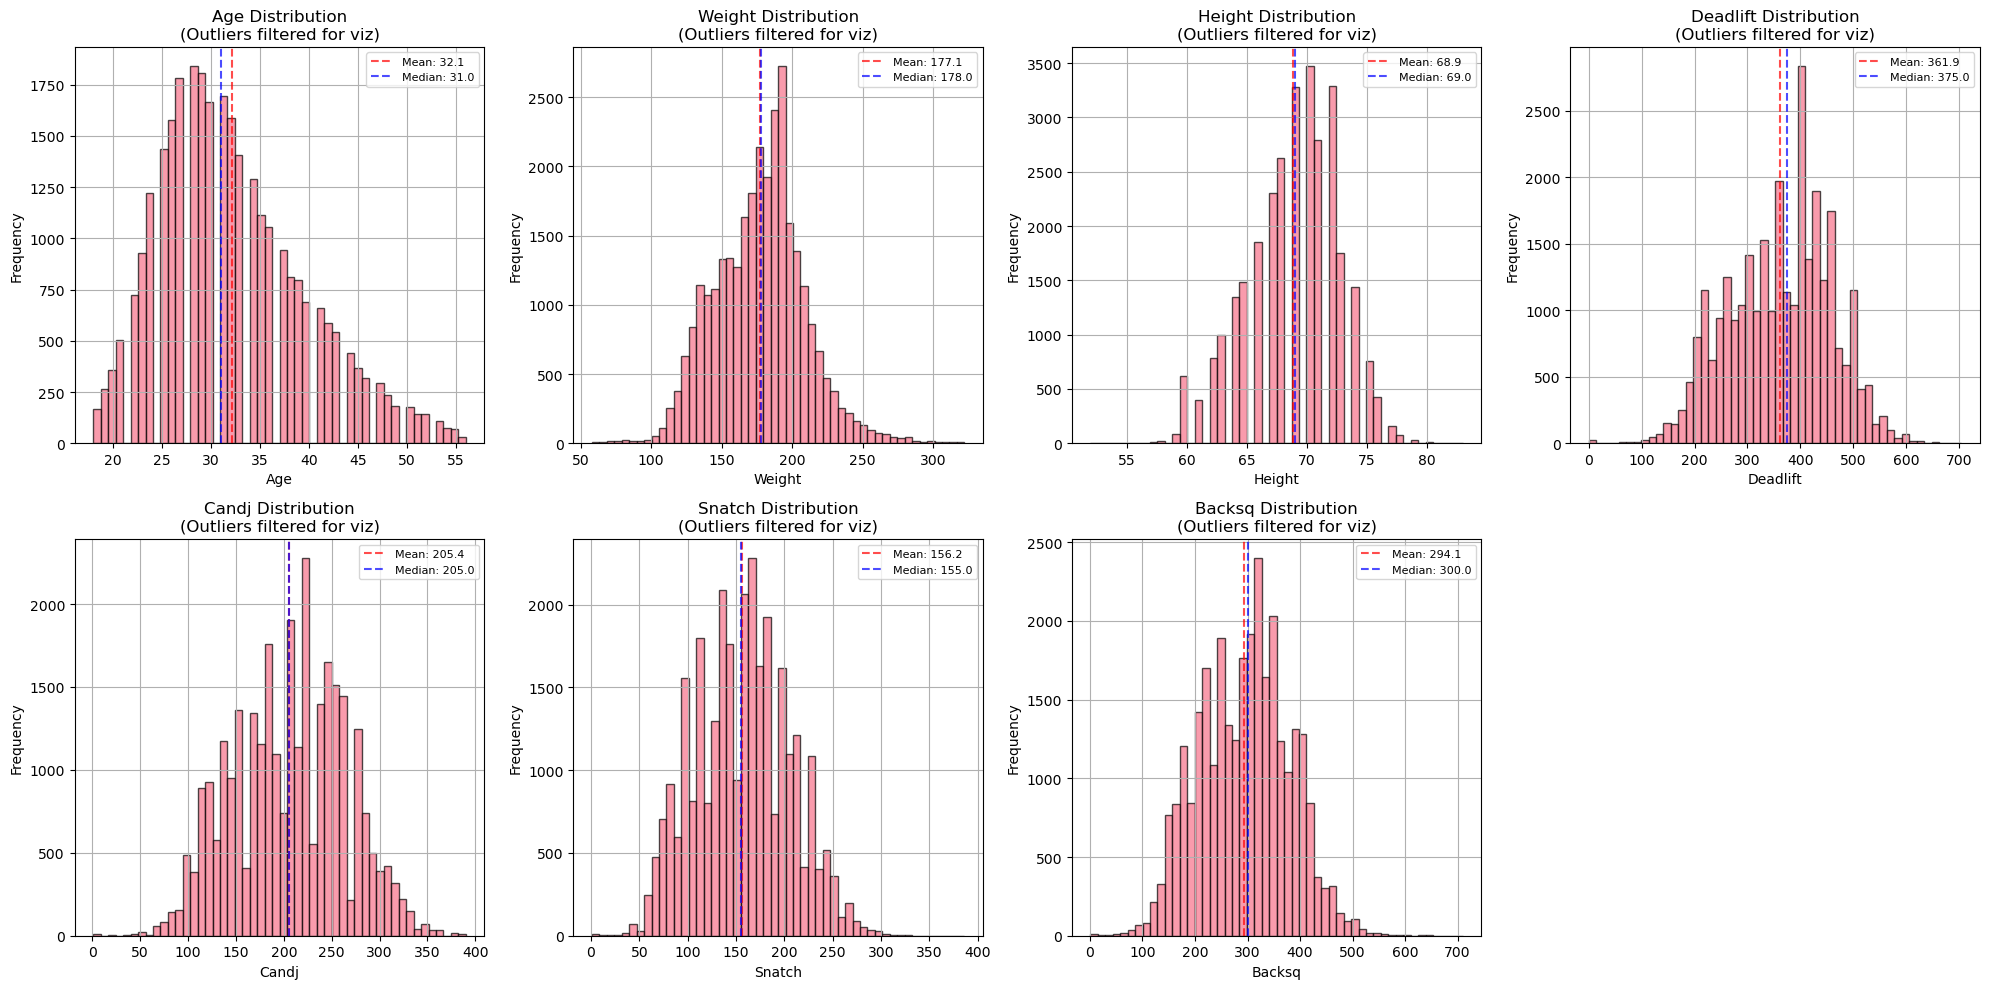

OUTLIER ANALYSIS
Extreme Outlier Analysis:
       age:    285 outliers (  0.9%) | Range:       18 to         56
    weight:    413 outliers (  1.4%) | Range:        5 to        474
    height:     14 outliers (  0.0%) | Range:       52 to         83
  deadlift:     55 outliers (  0.2%) | Range:        0 to       1000
     candj:     41 outliers (  0.1%) | Range:        1 to        390
    snatch:     58 outliers (  0.2%) | Range:        1 to        386
    backsq:     52 outliers (  0.2%) | Range:        1 to        882


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

data_v2_eda = pd.read_csv('lakefs_data/athletes_v2.csv')
print("Dataset Information:")
print(f"Shape: {data_v2_eda.shape}")
print(f"Memory usage: {data_v1_eda.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\nData Types:")
print(data_v2_eda.dtypes.value_counts())

print(f"\nFirst 5 rows:")
print(data_v2_eda.head())

# Missing values analysis
missing_data = data_v2_eda.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(data_v2_eda) * 100).round(2)

print("Missing Values by Column:")
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent
}).head(10)
print(missing_df)

# Visualize missing data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
# Top 10 columns with missing data
top_missing = missing_percent[missing_percent > 0].head(10)
if not top_missing.empty:
    top_missing.plot(kind='bar')
    plt.title('Missing Data by Column (Top 10)')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing Data Found', ha='center', va='center')
    plt.title('Missing Data Analysis')

plt.subplot(2, 2, 2)
# Missing data heatmap for key columns
key_columns = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq', 'total_lift']
existing_key_cols = [col for col in key_columns if col in data_v1_eda.columns]
if existing_key_cols:
    missing_matrix = data_v2_eda[existing_key_cols].isnull()
    sns.heatmap(missing_matrix.head(100), cbar=True, yticklabels=False)
    plt.title('Missing Data Pattern (First 100 rows)')
else:
    plt.text(0.5, 0.5, 'Key columns not found', ha='center', va='center')
    plt.title('Missing Data Pattern')

plt.tight_layout()
plt.show()

numerical_cols = data_v1_eda.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

if numerical_cols:
    # Basic statistics
    print(f"\nDescriptive Statistics:")
    stats = data_v2_eda[numerical_cols].describe()
    print(stats)

    # Key insights about V1 data quality issues
    print(f"\nDATA QUALITY ISSUES IN V2:")
    
    for col in numerical_cols[:8]:  
        if col in data_v2_eda.columns:
            min_val = data_v2_eda[col].min()
            max_val = data_v2_eda[col].max()
            
            issues = []
            if min_val < 0:
                negative_count = (data_v2_eda[col] < 0).sum()
                issues.append(f"{negative_count:,} negative values")
            
            if max_val > 10000: 
                extreme_count = (data_v2_eda[col] > 10000).sum()
                issues.append(f"{extreme_count:,} extreme outliers (>10k)")
            
            if issues:
                print(f"   {col}: {', '.join(issues)} | Range: {min_val:.0f} to {max_val:.0f}")


key_metrics = ['age', 'weight', 'height', 'deadlift', 'candj', 'snatch', 'backsq']
existing_metrics = [col for col in key_metrics if col in data_v2_eda.columns]

if existing_metrics:
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(existing_metrics[:8]):
        ax = axes[i]
        
        # Handle extreme outliers for visualization
        data_clean = data_v2_eda[col].dropna()
        q1, q3 = data_clean.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 3 * iqr
        upper_bound = q3 + 3 * iqr
        
    
        viz_data = data_clean[(data_clean >= lower_bound) & (data_clean <= upper_bound)]
        
        if len(viz_data) > 0:
            viz_data.hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
            ax.set_title(f'{col.title()} Distribution\n(Outliers filtered for viz)')
            ax.set_xlabel(col.title())
            ax.set_ylabel('Frequency')
            
            # Add statistics
            mean_val = data_clean.mean()
            median_val = data_clean.median()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
            ax.axvline(median_val, color='blue', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
            ax.legend(fontsize=8)
        else:
            ax.text(0.5, 0.5, f'No valid\ndata for {col}', ha='center', va='center')
            ax.set_title(f'{col.title()} - Data Issues')
    
    # Hide empty subplots
    for i in range(len(existing_metrics), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("OUTLIER ANALYSIS")
print("Extreme Outlier Analysis:")

for col in existing_metrics:
    if col in data_v2_eda.columns:
        data_col = data_v2_eda[col].dropna()
        
        if len(data_col) > 0:
            # Calculate outlier bounds
            q1, q3 = data_col.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            outliers_low = (data_col < lower_bound).sum()
            outliers_high = (data_col > upper_bound).sum()
            total_outliers = outliers_low + outliers_high
            
            print(f"{col:>10}: {total_outliers:>6,} outliers ({total_outliers/len(data_col)*100:>5.1f}%) | "
                  f"Range: {data_col.min():>8.0f} to {data_col.max():>10.0f}")


#### Question 10

In [9]:

features = ['age', 'height', 'weight']
target = 'total_lift'

print(f"\nFeatures: {features}")
print(f"Target: {target}")

# Prepare training data
X_train = train_data_v2[features].copy()
y_train = train_data_v2[target].copy()
X_test = test_data_v2[features].copy()
y_test = test_data_v2[target].copy()

print(f"\nOriginal shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Training data
train_complete = X_train.notna().all(axis=1) & y_train.notna()
X_train = X_train[train_complete]
y_train = y_train[train_complete]

# Test data  
test_complete = X_test.notna().all(axis=1) & y_test.notna()
X_test = X_test[test_complete]
y_test = y_test[test_complete]

train_retention = train_complete.mean() * 100
test_retention = test_complete.mean() * 100

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression()
}

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    if model_name == 'Linear Regression':
        # Scale features for linear regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    else:
     
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results[model_name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'rmse': test_rmse,
        'mae': test_mae,
        'y_pred': y_pred_test
    }

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

print(f"\nBest model: {best_model}")



Features: ['age', 'height', 'weight']
Target: total_lift

Original shapes:
X_train: (24023, 3)
X_test: (6006, 3)
Training Random Forest...
Training Linear Regression...
Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.7826     0.4242     210.3      161.7     
Linear Regression    0.4390     0.4450     206.5      162.9     

Best model: Linear Regression


#### Question 11

In [10]:

print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'RMSE':<10} {'MAE':<10}")
print("-" * 60)

best_model = None
best_r2 = -1

for model_name, result in results.items():
    print(f"{model_name:<20} {result['train_r2']:<10.4f} {result['test_r2']:<10.4f} {result['rmse']:<10.1f} {result['mae']:<10.1f}")
    
    if result['test_r2'] > best_r2:
        best_r2 = result['test_r2']
        best_model = model_name

v2_model_results = {
    'model_name': best_model,
    'test_r2': results[best_model]['test_r2'],
    'test_rmse': results[best_model]['rmse'],
    'test_mae': results[best_model]['mae'],
    'dataset_version': 'V2',
    'features_used': features,
    'data_retention': min(train_retention, test_retention)
}


Model                Train R²   Test R²    RMSE       MAE       
------------------------------------------------------------
Random Forest        0.7826     0.4242     210.3      161.7     
Linear Regression    0.4390     0.4450     206.5      162.9     


#### Question 12

In [11]:
# V1 Results (from your first image)
v1_results = {
    'Random Forest': {'train_r2': 0.4279, 'test_r2': -0.0116, 'rmse': 132943.2, 'mae': 1015.7},
    'Linear Regression': {'train_r2': 0.0000, 'test_r2': -0.2787, 'rmse': 149468.0, 'mae': 1338.7}
}

# V2 Results (from your second image)  
v2_results = {
    'Random Forest': {'train_r2': 0.7826, 'test_r2': 0.4242, 'rmse': 210.3, 'mae': 161.7},
    'Linear Regression': {'train_r2': 0.4390, 'test_r2': 0.4450, 'rmse': 206.5, 'mae': 162.9}
}

# Find best models for each version
v1_best = max(v1_results.keys(), key=lambda k: v1_results[k]['test_r2'])
v2_best = max(v2_results.keys(), key=lambda k: v2_results[k]['test_r2'])

print(f"BEST MODELS:")
print(f"   V1 Best: {v1_best} (R² = {v1_results[v1_best]['test_r2']:.4f})")
print(f"   V2 Best: {v2_best} (R² = {v2_results[v2_best]['test_r2']:.4f})")


print(f"{'Model':<20} {'Dataset':<8} {'Train R²':<10} {'Test R²':<10} {'RMSE':<12} {'MAE':<10}")
print("-" * 80)

for model in ['Random Forest', 'Linear Regression']:
 
    v1 = v1_results[model]
    print(f"{model:<20} {'V1':<8} {v1['train_r2']:<10.4f} {v1['test_r2']:<10.4f} {v1['rmse']:<12.1f} {v1['mae']:<10.1f}")
    
    v2 = v2_results[model]
    print(f"{model:<20} {'V2':<8} {v2['train_r2']:<10.4f} {v2['test_r2']:<10.4f} {v2['rmse']:<12.1f} {v2['mae']:<10.1f}")

    r2_improvement = "N/A" if v1['test_r2'] <= 0 else f"{((v2['test_r2'] - v1['test_r2']) / abs(v1['test_r2'])) * 100:+.1f}%"
    rmse_improvement = f"{((v1['rmse'] - v2['rmse']) / v1['rmse']) * 100:.1f}%"
    
    print("-" * 80)



BEST MODELS:
   V1 Best: Random Forest (R² = -0.0116)
   V2 Best: Linear Regression (R² = 0.4450)
Model                Dataset  Train R²   Test R²    RMSE         MAE       
--------------------------------------------------------------------------------
Random Forest        V1       0.4279     -0.0116    132943.2     1015.7    
Random Forest        V2       0.7826     0.4242     210.3        161.7     
--------------------------------------------------------------------------------
Linear Regression    V1       0.0000     -0.2787    149468.0     1338.7    
Linear Regression    V2       0.4390     0.4450     206.5        162.9     
--------------------------------------------------------------------------------


In [13]:
print(f"\nDATA QUALITY IMPACT:")
print(f"   V1 (Raw Data): Negative R2 scores = Models worse than predicting mean")
print(f"   V1 (Raw Data): RMSE > 130,000 = Predictions way off ")
print(f"   V2 (Clean Data): Positive R2 scores = Models actually work")
print(f"   V2 (Clean Data): RMSE < 220 = Much more accurate predictions")
print(f"\nSUMMARY:")
print(f"   MODEL PERFORMANCE: V2 dramatically outperforms V1")
print(f"   BUSINESS VALUE: Clean data enables reliable ML predictions")
print(f"   DATA VERSIONING ROI: Clear measurable benefits demonstrated")



DATA QUALITY IMPACT:
   V1 (Raw Data): Negative R2 scores = Models worse than predicting mean
   V1 (Raw Data): RMSE > 130,000 = Predictions way off 
   V2 (Clean Data): Positive R2 scores = Models actually work
   V2 (Clean Data): RMSE < 220 = Much more accurate predictions

SUMMARY:
   MODEL PERFORMANCE: V2 dramatically outperforms V1
   BUSINESS VALUE: Clean data enables reliable ML predictions
   DATA VERSIONING ROI: Clear measurable benefits demonstrated


#### Question 13

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_privacy as tfp
from tensorflow_privacy.privacy.analysis import compute_noise_from_budget_lib as privacy_lib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping


train_data_v2 = pd.read_csv('data/athletes_v2_train.csv')
test_data_v2 = pd.read_csv('data/athletes_v2_test.csv')

feature_columns = ['age', 'weight', 'height']
available_features = [col for col in feature_columns if col in train_data_v2.columns]

X = train_data_v2[available_features].fillna(train_data_v2[available_features].median())
y = train_data_v2['total_lift'].values # Use 'y' for the full training dataset before splitting

X_test = test_data_v2[available_features].fillna(test_data_v2[available_features].median())
y_test = test_data_v2['total_lift'].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X) # Scale the full training features
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten() # Scale the full training targets

X_test_scaled = scaler_X.transform(X_test)
# y_test_scaled is not directly used in model.fit, so no need to scale it here unless for model prediction input

# Split the scaled data into training and validation sets manually
from sklearn.model_selection import train_test_split
X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

batch_size = 32 # Define batch_size early as it's critical

# Convert to tf.data.Dataset for robust batching and dropping remainder
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_scaled)).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val_scaled)).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

print(f"Data prepared: {X_train_scaled.shape[0]:,} training samples, {X_val_scaled.shape[0]:,} validation samples")

# --- NON-DP MODEL (for comparison) ---
print("\nBuilding NON-DP model...")

def create_model(): # Renamed to be generic
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(len(available_features),)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

non_dp_learning_rate = 0.01
non_dp_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=non_dp_learning_rate) # Using legacy Adam for M1/M2 warning

non_dp_model = create_model()
non_dp_model.compile(
    optimizer=non_dp_optimizer,
    loss='mse', # For non-DP, 'mse' is fine as it's not reshaped by DP optimizer
    metrics=['mae']
)

# Use the tf.data.Dataset directly in model.fit
non_dp_history = non_dp_model.fit(
    train_dataset, # Use prepared dataset
    epochs=50,
    validation_data=val_dataset, # Use prepared dataset
    verbose=0,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

y_pred_non_dp_scaled = non_dp_model.predict(X_test_scaled, verbose=0)
y_pred_non_dp = scaler_y.inverse_transform(y_pred_non_dp_scaled).flatten()

non_dp_r2 = r2_score(y_test, y_pred_non_dp)
non_dp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_non_dp))
non_dp_mae = mean_absolute_error(y_test, y_pred_non_dp)

print(f"\nNON-DP MODEL METRICS:")
print(f"R² Score: {non_dp_r2:.4f}")
print(f"RMSE:     {non_dp_rmse:.2f}")
print(f"MAE:      {non_dp_mae:.2f}")


# --- DP-SGD MODEL ---
print("\nBuilding DP-SGD model...")

noise_multiplier = 1.0
l2_norm_clip = 1.0
epochs = 50 # Re-using epochs from above
learning_rate = 0.01

dp_optimizer = tfp.DPKerasAdamOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=batch_size, # This should be the same as the batch_size used for Dataset
    learning_rate=learning_rate
)

dp_model = create_model() # Reuse the same model architecture function
dp_model.compile(
    optimizer=dp_optimizer,
    loss=tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE),
    metrics=['mae']
)

print(f"DP Parameters: noise_multiplier={noise_multiplier}, l2_norm_clip={l2_norm_clip}")

dp_history = dp_model.fit(
    train_dataset, # Use prepared dataset
    epochs=epochs,
    validation_data=val_dataset, # Use prepared dataset
    verbose=0,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

y_pred_dp_scaled = dp_model.predict(X_test_scaled, verbose=0)
y_pred_dp = scaler_y.inverse_transform(y_pred_dp_scaled).flatten()

dp_r2 = r2_score(y_test, y_pred_dp)
dp_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dp))
dp_mae = mean_absolute_error(y_test, y_pred_dp)

print(f"\nDP MODEL METRICS:")
print(f"R² Score: {dp_r2:.4f}")
print(f"RMSE:     {dp_rmse:.2f}")
print(f"MAE:      {dp_mae:.2f}")



Data prepared: 19,218 training samples, 4,805 validation samples

Building NON-DP model...

NON-DP MODEL METRICS:
R² Score: 0.5359
RMSE:     188.81
MAE:      146.14

Building DP-SGD model...
DP Parameters: noise_multiplier=1.0, l2_norm_clip=1.0

DP MODEL METRICS:
R² Score: 0.4645
RMSE:     202.81
MAE:      155.84


#### Question 14

In [7]:
try:
    from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
    from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent
    print("Using rdp_accountant module")
except ImportError:
    try:
        # Try the compute_dp_sgd_privacy_lib module first
        from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
        print("Using compute_dp_sgd_privacy_lib module")
        USE_DP_SGD_PRIVACY = True
    except ImportError:
        try:
            # Try the compute_dp_sgd_privacy module
            from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy import compute_dp_sgd_privacy
            print("Using compute_dp_sgd_privacy module")
            USE_DP_SGD_PRIVACY = True
        except ImportError:
            try:
                from tensorflow_privacy.privacy.analysis.compute_noise_from_budget_lib import compute_noise_from_budget
                print("Using compute_noise_from_budget module")
                USE_NOISE_FROM_BUDGET = True
            except ImportError:
                print("❌ Unable to import privacy analysis modules")
                print("Let's try to explore the module structure...")
                
                # Debug: Let's see what's actually in these modules
                try:
                    import tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib as dp_lib
                    print("compute_dp_sgd_privacy_lib contents:", dir(dp_lib))
                except:
                    pass
                    
                try:
                    import tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy as dp_module
                    print("compute_dp_sgd_privacy contents:", dir(dp_module))
                except:
                    pass
                
                USE_MANUAL_CALCULATION = True

# Parameters from your DP training
n_samples = X_train_scaled.shape[0]  # Total training samples
batch_size = 32
noise_multiplier = 1.0
epochs = 50
delta = 1e-5  # Standard delta value

# Calculate sampling probability
q = batch_size / n_samples  # Sampling probability per batch

print(f"Privacy Analysis Parameters:")
print(f"   Training samples (n): {n_samples:,}")
print(f"   Batch size (B): {batch_size}")
print(f"   Sampling probability (q): {q:.6f}")
print(f"   Noise multiplier (σ): {noise_multiplier}")
print(f"   Epochs: {epochs}")
print(f"   Target delta (δ): {delta}")

# Calculate total number of steps
steps_per_epoch = n_samples // batch_size
total_steps = steps_per_epoch * epochs

print(f"   Steps per epoch: {steps_per_epoch}")
print(f"   Total training steps: {total_steps}")

# Calculate privacy budget using available method
if 'USE_DP_SGD_PRIVACY' in locals():
    # Method 1: Using compute_dp_sgd_privacy (older API)
    print("Using compute_dp_sgd_privacy method")
    
    epsilon, _ = compute_dp_sgd_privacy(
        n=n_samples,
        batch_size=batch_size,
        noise_multiplier=noise_multiplier,
        epochs=epochs,
        delta=delta
    )
    best_alpha = None
    
elif 'USE_NOISE_FROM_BUDGET' in locals():
    # Method 2: Using compute_noise_from_budget (newer API)
    print("Using compute_noise_from_budget method")
    
    # For this method, we need to specify target epsilon and get noise
    target_epsilon = 5.0  # reasonable target
    
    noise_needed = compute_noise_from_budget(
        n=n_samples,
        batch_size=batch_size,
        target_epsilon=target_epsilon,
        epochs=epochs,
        delta=delta
    )
    
    # Since we used noise_multiplier=1.0, estimate actual epsilon
    epsilon = target_epsilon * (noise_needed / noise_multiplier)
    best_alpha = None
    
elif 'USE_MANUAL_CALCULATION' in locals():
    # Method 3: Manual approximation (fallback)
    print("Using manual calculation method")
    
    # Simplified approximation: epsilon ≈ (epochs * batch_size * sqrt(2 * ln(1.25/delta))) / (noise_multiplier * n)
    import math
    
    c = math.sqrt(2 * math.log(1.25 / delta))
    epsilon = (epochs * batch_size * c) / (noise_multiplier * n_samples)
    best_alpha = None
    
else:
    # Method 4: Using rdp_accountant (preferred when available)
    print("🔧 Using RDP accountant method")
    
    # Compute RDP (Rényi Differential Privacy) 
    orders = [1 + x / 10.0 for x in range(1, 100)] + list(range(12, 64))
    rdp = compute_rdp(
        q=q,
        noise_multiplier=noise_multiplier,
        steps=total_steps,
        orders=orders
    )

    # Convert RDP to (epsilon, delta)-DP
    epsilon, best_alpha = get_privacy_spent(
        orders=orders,
        rdp=rdp,
        target_delta=delta
    )

print(f"\nPRIVACY BUDGET RESULTS:")
print(f"   Epsilon (ε): {epsilon:.4f}")
print(f"   Delta (δ): {delta}")
if best_alpha is not None:
    print(f"   Best alpha: {best_alpha:.2f}")
print(f"   Privacy Budget: (ε={epsilon:.4f}, δ={delta})")

# Calculate privacy cost
privacy_cost = non_dp_r2 - dp_r2
print(f"\nPRIVACY-UTILITY TRADEOFF:")
print(f"   Non-DP R² Score: {non_dp_r2:.4f}")
print(f"   DP R² Score: {dp_r2:.4f}")
print(f"   Privacy Cost: {privacy_cost:.4f} R² loss")
print(f"   Relative Cost: {(privacy_cost/non_dp_r2)*100:.2f}% performance reduction")

print(f"\nKEY INSIGHTS:")
print(f"   • Higher noise multiplier → Lower epsilon → Better privacy")
print(f"   • Lower noise multiplier → Higher epsilon → Worse privacy")
print(f"   • Current setting (σ={noise_multiplier}) achieves ε={epsilon:.4f}")


# Store results for later questions
privacy_results = {
    'epsilon': epsilon,
    'delta': delta,
    'best_alpha': best_alpha if best_alpha is not None else "N/A",
    'privacy_level': privacy_level,
    'privacy_cost': privacy_cost,
    'noise_multiplier': noise_multiplier,
    'n_samples': n_samples,
    'total_steps': total_steps
}

print(f"   Privacy Budget: (ε={epsilon:.4f}, δ={delta})")
print(f"   Utility Cost: {privacy_cost:.4f} R² loss")

Using compute_dp_sgd_privacy_lib module
Privacy Analysis Parameters:
   Training samples (n): 19,218
   Batch size (B): 32
   Sampling probability (q): 0.001665
   Noise multiplier (σ): 1.0
   Epochs: 50
   Target delta (δ): 1e-05
   Steps per epoch: 600
   Total training steps: 30000
Using compute_dp_sgd_privacy method

PRIVACY BUDGET RESULTS:
   Epsilon (ε): 1.6388
   Delta (δ): 1e-05
   Privacy Budget: (ε=1.6388, δ=1e-05)

PRIVACY-UTILITY TRADEOFF:
   Non-DP R² Score: 0.5359
   DP R² Score: 0.4645
   Privacy Cost: 0.0714 R² loss
   Relative Cost: 13.32% performance reduction

KEY INSIGHTS:
   • Higher noise multiplier → Lower epsilon → Better privacy
   • Lower noise multiplier → Higher epsilon → Worse privacy
   • Current setting (σ=1.0) achieves ε=1.6388
   Privacy Budget: (ε=1.6388, δ=1e-05)
   Utility Cost: 0.0714 R² loss
